# **Bima Bayu Saputra** || **Kompi 17** || **SC61720**

# **Import Library**

In [69]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import warnings
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import LabelEncoder
from scipy.stats import skew, norm
from scipy.stats.mstats import winsorize

In [70]:
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=UserWarning)

# **Data Preparation**

## **Load Dataset**

In [71]:
filepath1 = 'https://raw.githubusercontent.com/BimaBayuUWUUU/DSAI_Batch6_Code/main/Dataset/train.csv'

In [72]:
df1 = pd.read_csv(filepath1)

In [73]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [74]:
df1.head(5)

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD         Normal     208500  
1   2007        WD         Normal     181500  
2   2008        WD         Normal     223500  
3   2006        WD        Abnorml     140000  
4   2008        WD         Normal     250000  

[5 rows x 81 columns]

### **Konversi tipe data**

Karena beberapa kolom merupakan kolom `nominal` dan `ordinal` dengan tipe data `numerik` maka diperlukan konversi tipe data tersebut ke dalam tipe data `category`. Selain itu perlu dirubah juga kolom `objec`t menjadi tipe data `category`. Hal ini berdasarkan informasi yang didapat dari deskripsi data yang terlampir pada datset bahwa semua kolom dengan tipe data object adalah data yang memiliki kategori.

In [75]:
df_fix = df1.copy()
df_fix[['MSSubClass', 'OverallQual', 'OverallCond']] = df1[['MSSubClass', 'OverallQual', 'OverallCond']].astype('category')

In [76]:
for col in df_fix.select_dtypes(include=['object']):
    df_fix[col] = df_fix[col].astype('category')

In [77]:
df_fix.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Id             1460 non-null   int64   
 1   MSSubClass     1460 non-null   category
 2   MSZoning       1460 non-null   category
 3   LotFrontage    1201 non-null   float64 
 4   LotArea        1460 non-null   int64   
 5   Street         1460 non-null   category
 6   Alley          91 non-null     category
 7   LotShape       1460 non-null   category
 8   LandContour    1460 non-null   category
 9   Utilities      1460 non-null   category
 10  LotConfig      1460 non-null   category
 11  LandSlope      1460 non-null   category
 12  Neighborhood   1460 non-null   category
 13  Condition1     1460 non-null   category
 14  Condition2     1460 non-null   category
 15  BldgType       1460 non-null   category
 16  HouseStyle     1460 non-null   category
 17  OverallQual    1460 non-null   ca

## **Mencari missing value dan mengatasi missing value jika ada.**

### **Menemukan Missing Value**

In [78]:
def display_null_columns(df):
    null_values = df.isnull()

    null_count = null_values.sum()
    
    null_columns = null_count[null_count > 0]

    if not null_columns.empty:
        print("Kolom yang memiliki nilai null, jumlah null, dan tipe data kolomnya:")
        null_info = pd.concat([null_columns, df[null_columns.index].dtypes], axis=1)
        null_info.columns = ['Jumlah Null', 'Tipe Data']
        print(null_info)
    else:
        print("Tidak ada nilai null dalam DataFrame.")

In [79]:
display_null_columns(df_fix)

Kolom yang memiliki nilai null, jumlah null, dan tipe data kolomnya:
              Jumlah Null Tipe Data
LotFrontage           259   float64
Alley                1369  category
MasVnrType            872  category
MasVnrArea              8   float64
BsmtQual               37  category
BsmtCond               37  category
BsmtExposure           38  category
BsmtFinType1           37  category
BsmtFinType2           38  category
Electrical              1  category
FireplaceQu           690  category
GarageType             81  category
GarageYrBlt            81   float64
GarageFinish           81  category
GarageQual             81  category
GarageCond             81  category
PoolQC               1453  category
Fence                1179  category
MiscFeature          1406  category


### **Memperbaiki Mising Value pada data Ketegorik**

#### Data yang memang memiliki kelas **None** atau **NA**.

1. Alley
2. MasVnrType
3. BsmtQual
4. BsmtCond
5. BsmtExposure
6. BsmtFinType1
7. BsmtFinType2
8. FireplaceQu
9. GarageType
10. GarageFinish
11. GarageQual
12. GarageCond
13. PoolQC
14. Fence
15. MiscFeature

#### Data yang tidak memiliki kelas **None** atau **NA**.


1. MSZoning
2. Utilities
3. Exterior1st
4. Exterior2nd
5. Electrical
6. KitchenQual
7. Functional
8. SaleType

#### Mengubah nilai **None** atau **NA** menjadi **Without**.

Hal ini dilakukan karena sesuai deksripsi data memang ada kolom kategori dengan kelas **None** atau **NA** yang berarti tidak memiliki fasilitas tersebut.

In [80]:
def replace_nan_with_without(df, columns):
    df_copy = df.copy()
    for col in columns:
        if 'Without' not in df_copy[col].cat.categories:
            df_copy[col] = df_copy[col].cat.add_categories('Without')
        df_copy[col] = df_copy[col].fillna('Without')
    return df_copy

In [81]:
columns_to_update = [
    'Alley', 'MasVnrType', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
    'BsmtFinType1', 'BsmtFinType2', 'FireplaceQu', 'GarageType',
    'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence',
    'MiscFeature'
]

df_modified = replace_nan_with_without(df_fix, columns_to_update)

In [82]:
display_null_columns(df_modified)

Kolom yang memiliki nilai null, jumlah null, dan tipe data kolomnya:
             Jumlah Null Tipe Data
LotFrontage          259   float64
MasVnrArea             8   float64
Electrical             1  category
GarageYrBlt           81   float64


#### Memperbaiki Missing Value pada data String tanpa kategorikal **NA/None** menggunkana **modus**

In [83]:
def fill_na_with_mode(df, columns_to_fill):
    
    df_copy = df.copy()
    for col in columns_to_fill:
        mode_value = df_copy[col].mode()[0] 
        df_copy[col] = df_copy[col].fillna(mode_value)
        
    return df_copy

In [84]:
columns_to_fill = ['Electrical']

df_filled = fill_na_with_mode(df_modified, columns_to_fill)

In [85]:
display_null_columns(df_filled)

Kolom yang memiliki nilai null, jumlah null, dan tipe data kolomnya:
             Jumlah Null Tipe Data
LotFrontage          259   float64
MasVnrArea             8   float64
GarageYrBlt           81   float64


### **Memperbaiki Mising Value pada data Numerik**

#### Mengisi menggunakan **mean**. 

In [86]:
def fill_null_with_mean(df, columns_with_null):
    df_copy = df.copy()
    for col in columns_with_null:
        df_copy[col] = df_copy[col].fillna(df[col].median())
        
    return df_copy

In [87]:

columns_with_null = ['LotFrontage', 'MasVnrArea', 'GarageYrBlt']
df_missing_fixed = fill_null_with_mean(df_filled, columns_with_null)

In [88]:
display_null_columns(df_missing_fixed)

Tidak ada nilai null dalam DataFrame.


In [89]:
df_missing_fixed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Id             1460 non-null   int64   
 1   MSSubClass     1460 non-null   category
 2   MSZoning       1460 non-null   category
 3   LotFrontage    1460 non-null   float64 
 4   LotArea        1460 non-null   int64   
 5   Street         1460 non-null   category
 6   Alley          1460 non-null   category
 7   LotShape       1460 non-null   category
 8   LandContour    1460 non-null   category
 9   Utilities      1460 non-null   category
 10  LotConfig      1460 non-null   category
 11  LandSlope      1460 non-null   category
 12  Neighborhood   1460 non-null   category
 13  Condition1     1460 non-null   category
 14  Condition2     1460 non-null   category
 15  BldgType       1460 non-null   category
 16  HouseStyle     1460 non-null   category
 17  OverallQual    1460 non-null   ca

## **Mencari duplicate value dan menyelesaikan duplicate value jika ada.**

### **Menemukan duplicate value**

In [90]:
def check_duplicate_ids(df):
    duplicate_all= df.duplicated()
    
    duplicate_rows = df[duplicate_all]
    
    if not duplicate_rows.empty:
        print("Ada Data yang duplikat:")
        print(duplicate_rows)
    else:
        print("Tidak ada Data duplikat dalam DataFrame.")

In [91]:
check_duplicate_ids(df_missing_fixed)

Tidak ada Data duplikat dalam DataFrame.


In [92]:
df_fix_duplicate = df_missing_fixed.copy().drop_duplicates()

Duplikasi data tidak ditemukan dalam dataset. Maka tidak perlu dilakukan tindakan apapun.

## **Menentukan Tujuan Preparation Dataset dan Target Column**

Dalam dataset ini, tujuan dari persiapan data adalah untuk mempersiapkan data yang akan digunakan untuk melakukan analisis data dan pemodelan regresi. Target column yang akan digunakan adalah `SalePrice`.

In [93]:
target_columns = ['SalePrice']

## **Memeriksa outlier dan menangani outlier jika ada.**

### **Menemukan Outlier**

#### Boxplot

In [94]:
def plot_boxplot(df, target_columns, figsize=(12, 8)):
    num_plots = len(target_columns)
    num_cols = 4 

    num_rows = num_plots // num_cols
    if num_plots % num_cols:
        num_rows += 1

    fig, axes = plt.subplots(num_rows, num_cols, figsize=figsize)

    for i, column in enumerate(target_columns):
        row = i // num_cols
        col = i % num_cols
        ax = axes[row, col] if num_rows > 1 else axes[col]

        sns.boxplot(y=df[column], ax=ax)
        ax.set_title(f'Boxplot {column}')

    for i in range(num_plots, num_rows * num_cols):
        fig.delaxes(axes.flatten()[i])

    plt.tight_layout()
    plt.show()

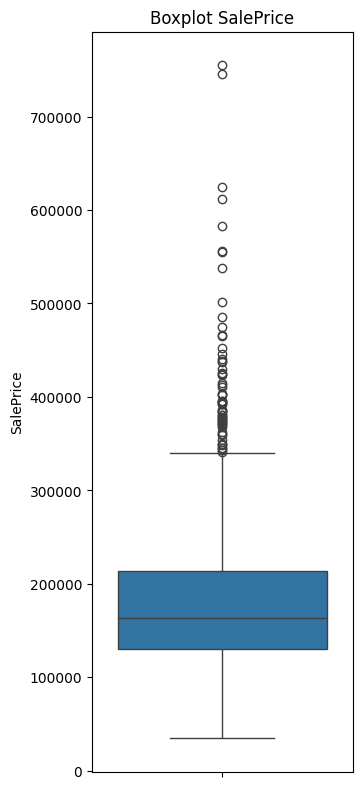

In [95]:
plot_boxplot(df_fix_duplicate, target_columns)

#### Check Outlier pada Kolom Target

In [96]:
Q1 = df_missing_fixed['SalePrice'].quantile(0.25)
Q3 = df_missing_fixed['SalePrice'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df_missing_fixed[(df_fix_duplicate['SalePrice'] < lower_bound) | (df_fix_duplicate['SalePrice'] > upper_bound)]
print("Data Outlier:")
outliers

Data Outlier:


Id MSSubClass MSZoning  LotFrontage  LotArea Street    Alley LotShape  \
11      12         60       RL         85.0    11924   Pave  Without      IR1   
53      54         20       RL         68.0    50271   Pave  Without      IR1   
58      59         60       RL         66.0    13682   Pave  Without      IR2   
112    113         60       RL         77.0     9965   Pave  Without      Reg   
151    152         20       RL        107.0    13891   Pave  Without      Reg   
...    ...        ...      ...          ...      ...    ...      ...      ...   
1268  1269         50       RL         69.0    14100   Pave  Without      IR1   
1353  1354         50       RL         56.0    14720   Pave  Without      IR1   
1373  1374         20       RL         69.0    11400   Pave  Without      Reg   
1388  1389         20       RL         42.0    14892   Pave  Without      IR1   
1437  1438         20       RL         96.0    12444   Pave  Without      Reg   

     LandContour Utilities  ... PoolArea   PoolQC    Fence MiscFeature  \
11           Lvl    AllPub  ...        0  Without  Without     Without   
53           Low    AllPub  ...        0  Without  Without     Without   
58           HLS    AllPub  ...        0  Without  Without     Without   
112          Lvl    AllPub  ...        0  Without  Without     Without   
151          Lvl    AllPub  ...        0  Without  Without     Without   
...          ...       ...  ...      ...      ...      ...         ...   
1268         Lvl    AllPub  ...        0  Without     GdWo     Without   
1353         Lvl    AllPub  ...        0  Without  Without     Without   
1373         Lvl    AllPub  ...        0  Without  Without     Without   
1388         HLS    AllPub  ...        0  Without  Without     Without   
1437         Lvl    AllPub  ...        0  Without  Without     Without   

     MiscVal MoSold YrSold SaleType SaleCondition  SalePrice  
11         0      7   2006      New       Partial     345000  
53         0     11   2006       WD        Normal     385000  
58         0     10   2006      New       Partial     438780  
112        0     10   2007      New       Partial     383970  
151        0      1   2008      New       Partial     372402  
...      ...    ...    ...      ...           ...        ...  
1268       0      5   2008       WD        Normal     381000  
1353       0      3   2010       WD        Normal     410000  
1373       0      3   2007       WD        Normal     466500  
1388       0     10   2009       WD        Normal     377500  
1437       0     11   2008      New       Partial     394617  

[61 rows x 81 columns]

In [97]:
lower_bound

3937.5

In [98]:
upper_bound

340037.5

### **Mengatasi Outlier**

#### Mengatasi Outliers dengan Winsorization

Secara singkatnya methode ini akan mengganti nilai outlier dengan nilai maksimum atau minimum yang telah ditentukan.

In [99]:
def transform_outliersW(df, numeric_columns):
    df_copy = df.copy()
    
    for column in numeric_columns:
        q1 = df_copy[column].quantile(0.25)
        q3 = df_copy[column].quantile(0.75)
        iqr = q3 - q1
        lower_bound = q1 - 1.5 * iqr
        upper_bound = q3 + 1.5 * iqr
        
        if (df_copy[column] < lower_bound).any() or (df_copy[column] > upper_bound).any():
            values = df_copy[column].values
            winsorized_data = winsorize(values, limits=[0.05, 0.05])
            df_copy[column] = winsorized_data
        
    return df_copy

In [100]:
df_otcW = transform_outliersW(df_fix_duplicate, target_columns)

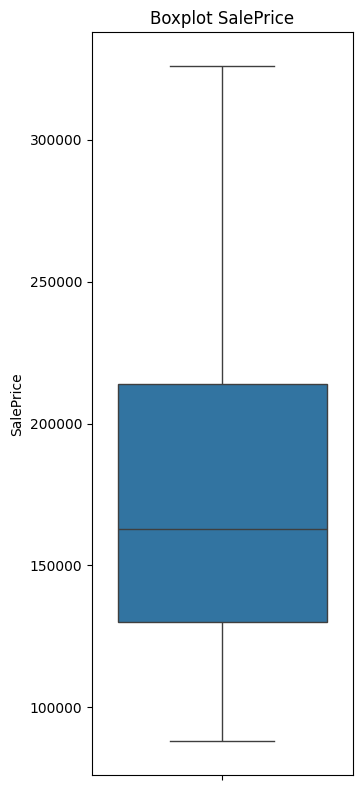

In [101]:
plot_boxplot(df_otcW, target_columns)

#### Mengatasi Outliers dengan Capping

Seacar singkatnya methode ini akan mengganti nilai yang berada di luar batas atas dan batas bawah dengan nilai batas atas dan batas bawah tersebut.

In [102]:
def transform_outliersC(df, target_columns):
    df_copy = df.copy()
    
    for column in target_columns:
        q1 = df_copy[column].quantile(0.25)
        q3 = df_copy[column].quantile(0.75)
        iqr = q3 - q1
        lower_bound = q1 - 1.5 * iqr
        upper_bound = q3 + 1.5 * iqr
        
        df_copy[column] = df_copy[column].clip(lower=lower_bound, upper=upper_bound)
        
    return df_copy


In [103]:
df_otcC = transform_outliersC(df_fix_duplicate, target_columns)

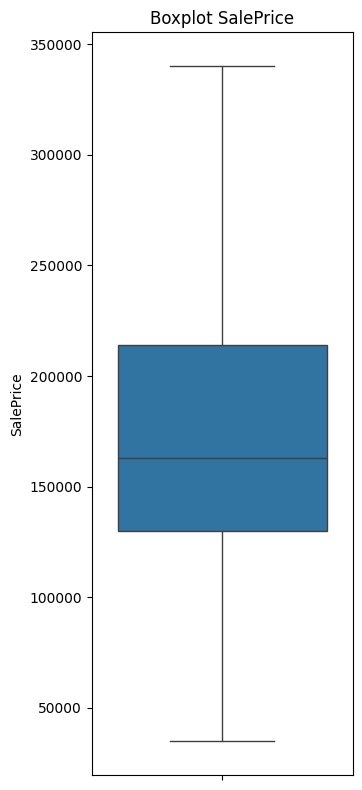

In [104]:
plot_boxplot(df_otcC, target_columns)

#### Hasil yang diambil

Metode Winsorization lebih cocok karena:

1. Efektivitas : Mengatasi outliers tanpa menghapus data sepenuhnya.
2. Mempertahankan Ukuran Sampel: Tidak mengurangi ukuran sampel secara signifikan.
3. Menghindari Bias: Mencegah bias yang mungkin terjadi dengan penghapusan data.
4. Fleksibel: Dapat disesuaikan dengan persentase pemotongan yang berbeda.

## **Memeriksa imbalance data dan menyelesaikan imbalance data jika ada.**

In [105]:
df_imbalance = df_otcW.copy()

### **Mencari Imbalance Data**

#### Histogram

In [106]:
def plot_numeric_columns_histogram_subplots(data, target_columns):
    if isinstance(target_columns, str):
        target_columns = [target_columns] 
        num_plots = 1 
    else:
        num_plots = len(target_columns)

    num_cols = 4
    num_rows = num_plots // num_cols
    if num_plots % num_cols:
        num_rows += 1

    fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(36, 8))
    
    if isinstance(axes, np.ndarray):
        axes = axes.flatten()
    else:
        axes = [axes]

    for i, column in enumerate(target_columns):
        ax = axes[i]
        sns.histplot(data[column], kde=True, ax=ax, color='skyblue')
        ax.set_title(f'Histogram of {column}')
        ax.set_xlabel(column)
        ax.set_ylabel('Frequency')
        ax.grid(False)
    
    for i in range(num_plots, num_rows * num_cols):
        plt.delaxes(axes[i])
    
    plt.tight_layout()
    plt.show()


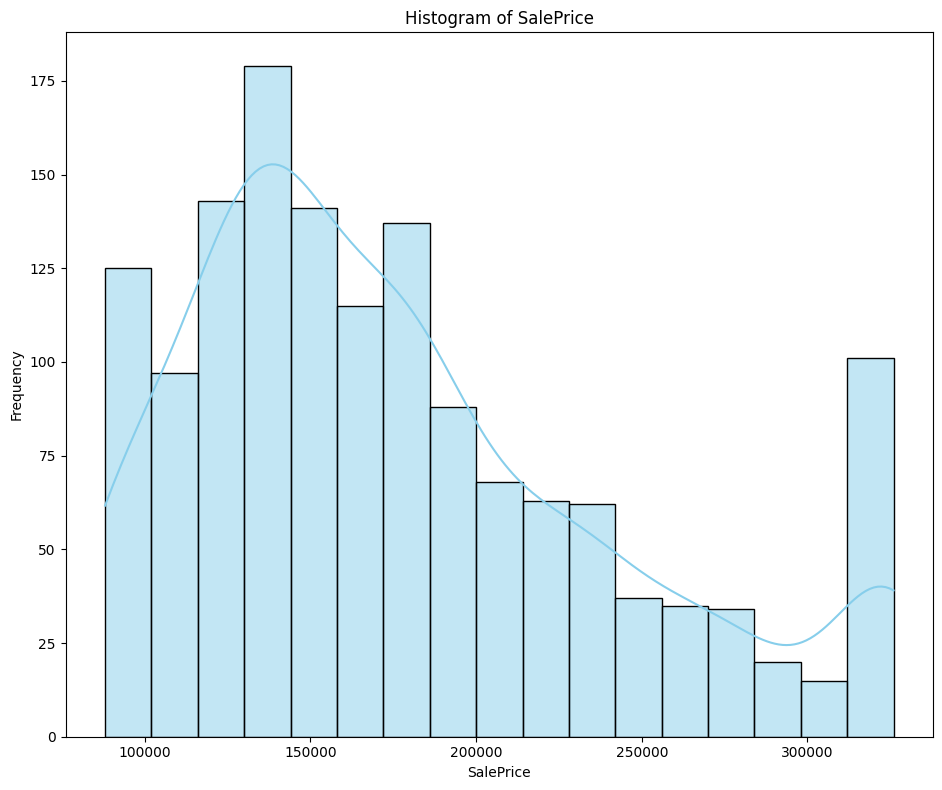

In [107]:
plot_numeric_columns_histogram_subplots(df_imbalance, target_columns)

#### Hitung Rasio Kelas Minoritas:Mayoritas

In [108]:
def calculate_class_imbalance_auto(df, columns, num_bins=10):
    categorical_columns = []
    continuous_columns = []

    for column in columns:
        if pd.api.types.is_categorical_dtype(df[column]) or pd.api.types.is_string_dtype(df[column]):
            categorical_columns.append(column)
        elif pd.api.types.is_numeric_dtype(df[column]):
            continuous_columns.append(column)

    imbalance_data = []

    for column in categorical_columns:
        class_counts = df[column].value_counts()
        minority_class_count = class_counts.min()
        majority_class_count = class_counts.max()
        imbalance_ratio = minority_class_count / majority_class_count
        imbalance_data.append([column, imbalance_ratio])

    for column in continuous_columns:
        bins = np.linspace(df[column].min(), df[column].max(), num_bins+1)
        categories = pd.cut(df[column], bins=bins, include_lowest=True)
        
        class_counts = categories.value_counts()
        
        minority_bin_count = class_counts.min()
        majority_bin_count = class_counts.max()
        imbalance_ratio = minority_bin_count / majority_bin_count

        imbalance_data.append([column, imbalance_ratio])

    imbalance_df = pd.DataFrame(imbalance_data, columns=['Column', 'Imbalance Ratio'])
    return imbalance_df


In [109]:
calculate_class_imbalance_auto(df_otcW, target_columns)

Column  Imbalance Ratio
0  SalePrice         0.131783

### **Mengatasi Masalah Imbalance Data**

**Tidak diperlukan balancing data karena dataset dipersiapkan untuk model regresi. Sehingga tidak perlu mengatasi imbalance data karena regresi sendiri tidak bergantung pada kelas-kelas dalam fitur.**

## **Membuat class Encoder dan Decoder**

In [110]:
class AutoLabelEncoder:
    def __init__(self):
        self.encoders = {}

    def fit_transform(self, df):
        for column in df.columns:
            if df[column].dtype == 'category':
                encoder = LabelEncoder()
                df[column] = encoder.fit_transform(df[column])
                self.encoders[column] = {label: index for index, label in enumerate(encoder.classes_)}
        return df
    
    def transform(self, df):
        for column, encoder in self.encoders.items():
            if column in df.columns:
                df[column] = df[column].map(encoder).fillna(df[column])
        return df

    def inverse_transform(self, df):
        for column, encoder in self.encoders.items():
            if column in df.columns:
                reverse_encoder = {v: k for k, v in encoder.items()}
                df[column] = df[column].map(reverse_encoder).fillna(df[column])
        return df


In [111]:
auto_encoder = AutoLabelEncoder()
encoded_df = auto_encoder.fit_transform(df_imbalance.copy())

# **Exploratory Data Analysis (EDA)**

## **Load Dataset**

In [112]:
data_eda = df_otcW

## **Mengelaborasi Features dan Tipe Data**

In [113]:
data_eda.head()

Id MSSubClass MSZoning  LotFrontage  LotArea Street    Alley LotShape  \
0   1         60       RL         65.0     8450   Pave  Without      Reg   
1   2         20       RL         80.0     9600   Pave  Without      Reg   
2   3         60       RL         68.0    11250   Pave  Without      IR1   
3   4         70       RL         60.0     9550   Pave  Without      IR1   
4   5         60       RL         84.0    14260   Pave  Without      IR1   

  LandContour Utilities  ... PoolArea   PoolQC    Fence MiscFeature MiscVal  \
0         Lvl    AllPub  ...        0  Without  Without     Without       0   
1         Lvl    AllPub  ...        0  Without  Without     Without       0   
2         Lvl    AllPub  ...        0  Without  Without     Without       0   
3         Lvl    AllPub  ...        0  Without  Without     Without       0   
4         Lvl    AllPub  ...        0  Without  Without     Without       0   

  MoSold YrSold SaleType SaleCondition  SalePrice  
0      2   2008       WD        Normal     208500  
1      5   2007       WD        Normal     181500  
2      9   2008       WD        Normal     223500  
3      2   2006       WD       Abnorml     140000  
4     12   2008       WD        Normal     250000  

[5 rows x 81 columns]

In [114]:
data_eda.tail()

Id MSSubClass MSZoning  LotFrontage  LotArea Street    Alley LotShape  \
1455  1456         60       RL         62.0     7917   Pave  Without      Reg   
1456  1457         20       RL         85.0    13175   Pave  Without      Reg   
1457  1458         70       RL         66.0     9042   Pave  Without      Reg   
1458  1459         20       RL         68.0     9717   Pave  Without      Reg   
1459  1460         20       RL         75.0     9937   Pave  Without      Reg   

     LandContour Utilities  ... PoolArea   PoolQC    Fence MiscFeature  \
1455         Lvl    AllPub  ...        0  Without  Without     Without   
1456         Lvl    AllPub  ...        0  Without    MnPrv     Without   
1457         Lvl    AllPub  ...        0  Without    GdPrv        Shed   
1458         Lvl    AllPub  ...        0  Without  Without     Without   
1459         Lvl    AllPub  ...        0  Without  Without     Without   

     MiscVal MoSold YrSold SaleType SaleCondition  SalePrice  
1455       0      8   2007       WD        Normal     175000  
1456       0      2   2010       WD        Normal     210000  
1457    2500      5   2010       WD        Normal     266500  
1458       0      4   2010       WD        Normal     142125  
1459       0      6   2008       WD        Normal     147500  

[5 rows x 81 columns]

In [115]:
print("Informasi Dataset:")
data_eda.info()

Informasi Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Id             1460 non-null   int64   
 1   MSSubClass     1460 non-null   category
 2   MSZoning       1460 non-null   category
 3   LotFrontage    1460 non-null   float64 
 4   LotArea        1460 non-null   int64   
 5   Street         1460 non-null   category
 6   Alley          1460 non-null   category
 7   LotShape       1460 non-null   category
 8   LandContour    1460 non-null   category
 9   Utilities      1460 non-null   category
 10  LotConfig      1460 non-null   category
 11  LandSlope      1460 non-null   category
 12  Neighborhood   1460 non-null   category
 13  Condition1     1460 non-null   category
 14  Condition2     1460 non-null   category
 15  BldgType       1460 non-null   category
 16  HouseStyle     1460 non-null   category
 17  OverallQual   

### **Korelasi Features**

In [116]:
# Hitung korelasi Pearson
sales_corr = encoded_df.corr()

In [117]:
sales_corr

Id  MSSubClass  MSZoning  LotFrontage   LotArea  \
Id             1.000000    0.018745 -0.006096    -0.009921 -0.033226   
MSSubClass     0.018745    1.000000  0.037785    -0.308683 -0.132505   
MSZoning      -0.006096    0.037785  1.000000    -0.105961 -0.034452   
LotFrontage   -0.009921   -0.308683 -0.105961     1.000000  0.304522   
LotArea       -0.033226   -0.132505 -0.034452     0.304522  1.000000   
...                 ...         ...       ...          ...       ...   
MoSold         0.021172    0.007052 -0.031496     0.010451  0.001205   
YrSold         0.000712   -0.022100 -0.020628     0.006380 -0.014261   
SaleType       0.019773    0.020195  0.097437    -0.031412  0.012292   
SaleCondition -0.005806   -0.033097  0.009494     0.058857  0.034169   
SalePrice     -0.027520   -0.054703 -0.208875     0.333487  0.262878   

                 Street     Alley  LotShape  LandContour  Utilities  ...  \
Id             0.008916 -0.001530  0.032122    -0.019659   0.013324  ...   
MSSubClass    -0.025737 -0.094916  0.090920    -0.007658  -0.026217  ...   
MSZoning       0.087654 -0.052039  0.061887    -0.017854  -0.001192  ...   
LotFrontage   -0.037349  0.132003 -0.138877    -0.076080  -0.001027  ...   
LotArea       -0.197131  0.060105 -0.165315    -0.149083   0.010123  ...   
...                 ...       ...       ...          ...        ...  ...   
MoSold         0.003690  0.013094 -0.033455    -0.011599  -0.051552  ...   
YrSold        -0.025043  0.020944  0.036449     0.020507   0.023353  ...   
SaleType       0.014339  0.008205 -0.000911    -0.025754  -0.126770  ...   
SaleCondition  0.006064  0.035717 -0.038118     0.033809  -0.089701  ...   
SalePrice      0.040484  0.150584 -0.275297     0.016736  -0.016171  ...   

               PoolArea    PoolQC     Fence  MiscFeature   MiscVal    MoSold  \
Id             0.057044 -0.033928 -0.000399     0.037057 -0.006242  0.021172   
MSSubClass     0.020837 -0.015024  0.074567     0.033339 -0.006062  0.007052   
MSZoning      -0.003128  0.002882 -0.061289     0.000673  0.009293 -0.031496   
LotFrontage    0.180819 -0.191902 -0.036421    -0.004266 -0.000255  0.010451   
LotArea        0.077672 -0.065167  0.036031    -0.103544  0.038068  0.001205   
...                 ...       ...       ...          ...       ...       ...   
MoSold        -0.033737  0.036368 -0.009892    -0.014193 -0.006495  1.000000   
YrSold        -0.059689  0.060904 -0.035366    -0.055962  0.004906 -0.145721   
SaleType       0.011009 -0.013592 -0.006154    -0.003311  0.015773 -0.047386   
SaleCondition -0.067251  0.097425  0.100675     0.003192  0.013027  0.013320   
SalePrice      0.056055 -0.063789  0.157374     0.074049 -0.018382  0.069022   

                 YrSold  SaleType  SaleCondition  SalePrice  
Id             0.000712  0.019773      -0.005806  -0.027520  
MSSubClass    -0.022100  0.020195      -0.033097  -0.054703  
MSZoning      -0.020628  0.097437       0.009494  -0.208875  
LotFrontage    0.006380 -0.031412       0.058857   0.333487  
LotArea       -0.014261  0.012292       0.034169   0.262878  
...                 ...       ...            ...        ...  
MoSold        -0.145721 -0.047386       0.013320   0.069022  
YrSold         1.000000 -0.002327       0.003880  -0.028968  
SaleType      -0.002327  1.000000       0.184067  -0.044484  
SaleCondition  0.003880  0.184067       1.000000   0.227129  
SalePrice     -0.028968 -0.044484       0.227129   1.000000  

[81 rows x 81 columns]

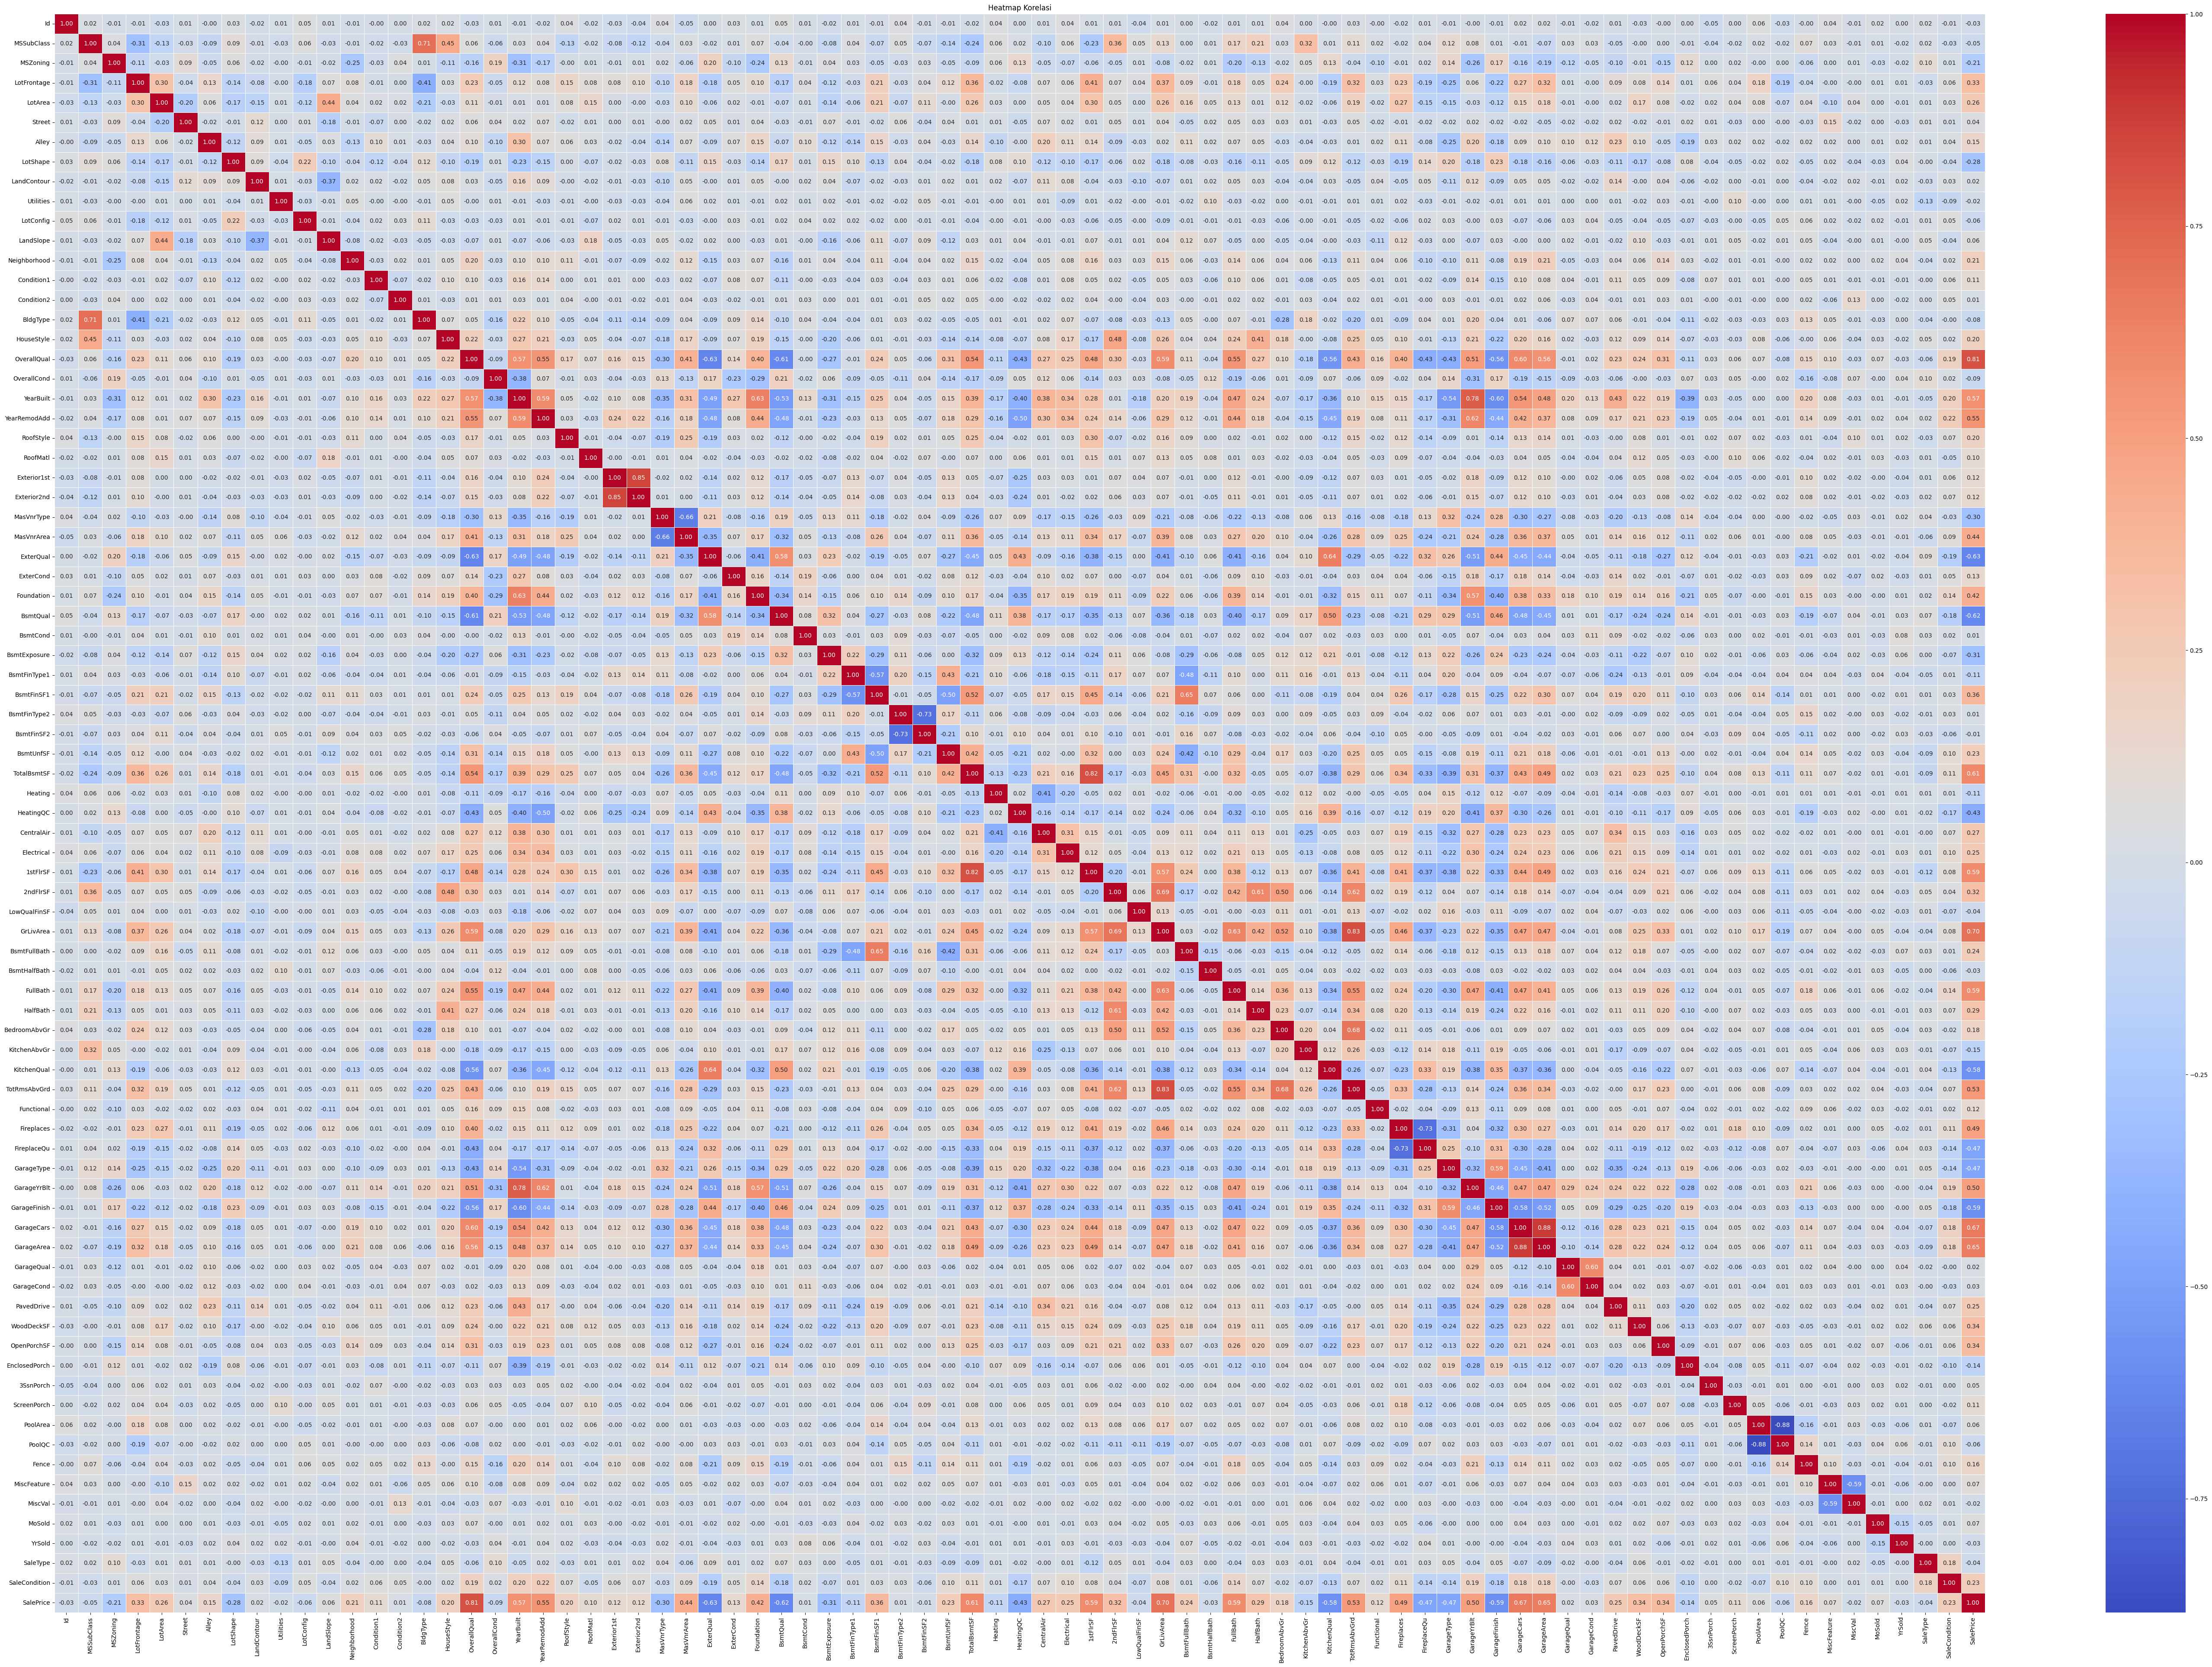

In [118]:
plt.figure(figsize=(72, 48))
sns.heatmap(sales_corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Heatmap Korelasi')
plt.show()

In [119]:
high_corr_columns = sales_corr[(sales_corr > 0.7) & (sales_corr < 1)]

for col1 in high_corr_columns.index:
    for col2 in high_corr_columns.index:
        if col1 != col2 and sales_corr.loc[col1, col2] > 0.7:
            print(f"{col1} dan {col2} memiliki korelasi: {sales_corr.loc[col1, col2]}")

MSSubClass dan BldgType memiliki korelasi: 0.7124744102567905
BldgType dan MSSubClass memiliki korelasi: 0.7124744102567905
OverallQual dan SalePrice memiliki korelasi: 0.812369458889186
YearBuilt dan GarageYrBlt memiliki korelasi: 0.7771817647425319
Exterior1st dan Exterior2nd memiliki korelasi: 0.8541629837325787
Exterior2nd dan Exterior1st memiliki korelasi: 0.8541629837325787
TotalBsmtSF dan 1stFlrSF memiliki korelasi: 0.8195299750050339
1stFlrSF dan TotalBsmtSF memiliki korelasi: 0.8195299750050339
GrLivArea dan TotRmsAbvGrd memiliki korelasi: 0.8254893743088425
TotRmsAbvGrd dan GrLivArea memiliki korelasi: 0.8254893743088425
GarageYrBlt dan YearBuilt memiliki korelasi: 0.7771817647425319
GarageCars dan GarageArea memiliki korelasi: 0.882475414281462
GarageArea dan GarageCars memiliki korelasi: 0.882475414281462
SalePrice dan OverallQual memiliki korelasi: 0.812369458889186


### **Univariate Analysis**

#### **Numerical Features**

In [120]:
def plot_numeric_columns_histogram_subplots(data):
    numeric_columns = data.select_dtypes(include='number').columns
    num_plots = len(numeric_columns)
    num_cols = 4
    num_rows = num_plots // num_cols
    if num_plots % num_cols:
        num_rows += 1
    fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(30, 60))
    
    for i, column in enumerate(numeric_columns):
        row = i // num_cols
        col = i % num_cols
        ax = axes[row, col]
        
        sns.histplot(data[column], kde=True, ax=ax, color='skyblue')
        ax.set_title(f'Histogram of {column}')
        ax.set_xlabel(column)
        ax.set_ylabel('Frequency')
        ax.grid(False)
    
    for i in range(num_plots, num_rows * num_cols):
        plt.delaxes(plt.subplot(num_rows, num_cols, i + 1))
    
    plt.show()

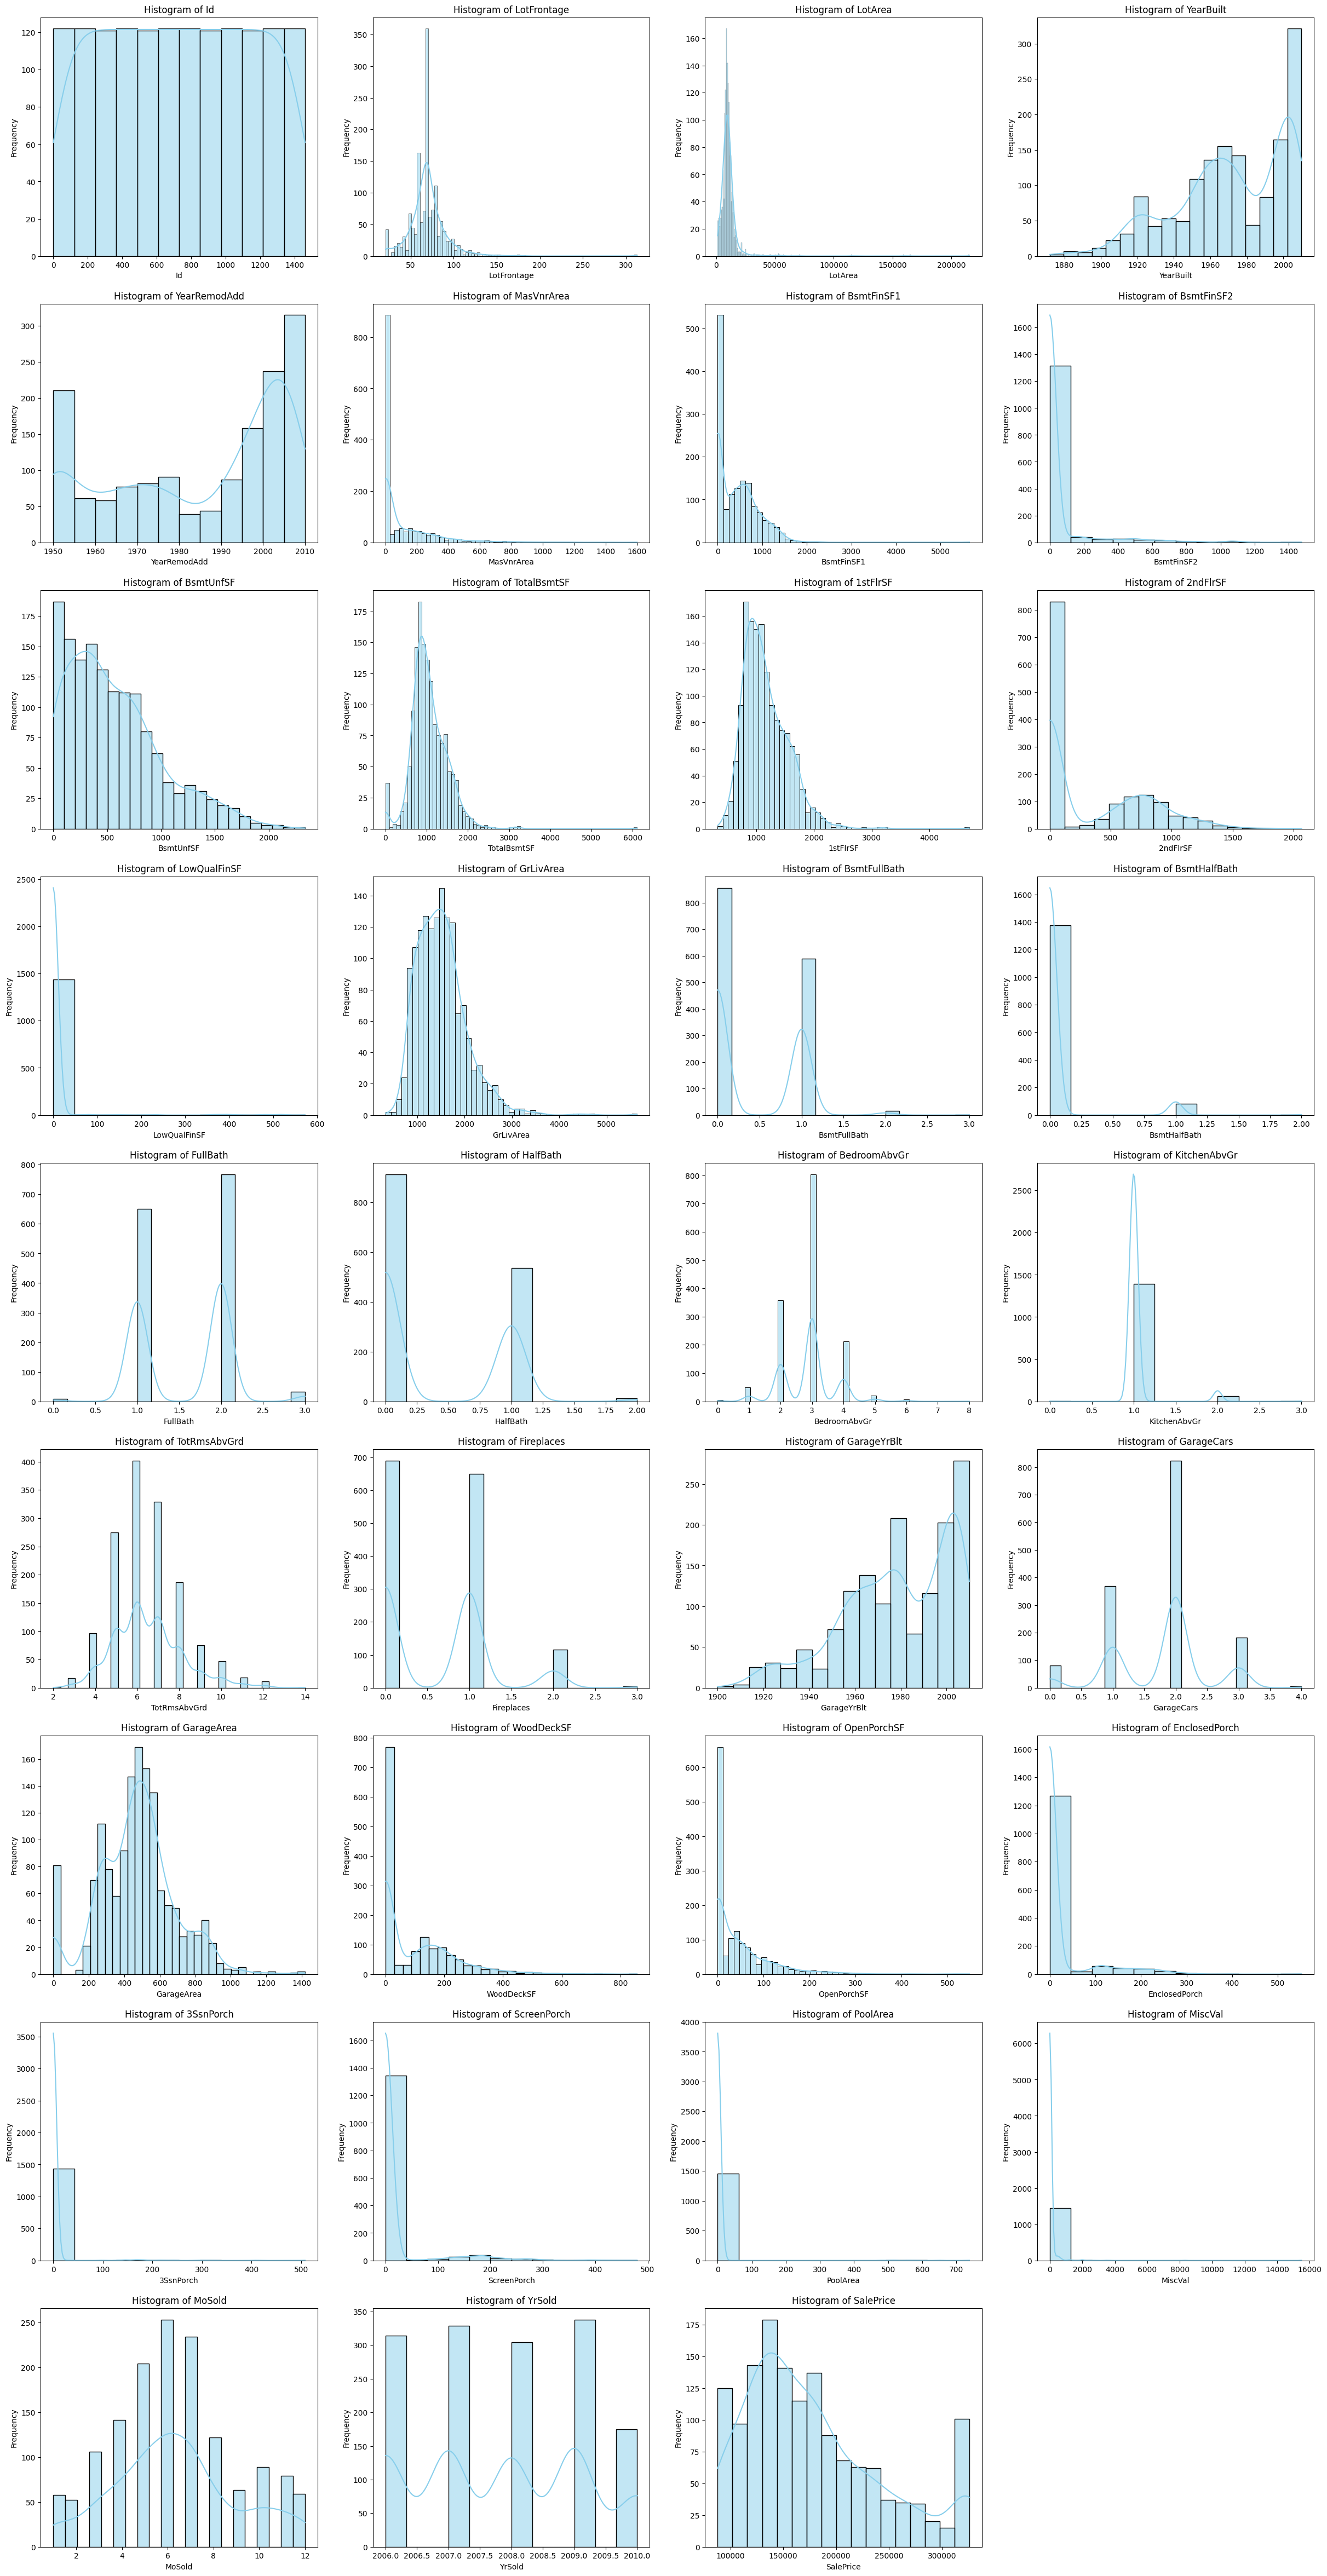

In [121]:
plot_numeric_columns_histogram_subplots(data_eda)

#### **Categorical Features**

In [122]:
def plot_categorical_histograms(df, figsize=(40, 86)): 
    num_cols = 3
    object_columns = df.select_dtypes(include='category').columns
    num_plots = len(object_columns)
    num_rows = num_plots // num_cols
    if num_plots % num_cols:
        num_rows += 1

    fig = plt.figure(figsize=figsize)
    plot_count = 0 
    
    for i, column in enumerate(object_columns):
        if df[column].nunique() > 10:
            figsize_custom = (24, 12)
            plt.figure(figsize=figsize_custom)
            sns.countplot(data=df, x=column, color='skyblue')
            plt.title(f'Count Plot {column}')
            plt.tight_layout()
            continue  
        else:
            plot_count += 1
            ax = fig.add_subplot(num_rows, num_cols, plot_count)
            sns.countplot(data=df, x=column, ax=ax, color='skyblue')
            ax.set_title(f'Count Plot {column}')       
    for i in range(num_plots, num_rows * num_cols):
        plt.delaxes(plt.subplot(num_rows, num_cols, i + 1))
        
    plt.tight_layout()
    plt.show()

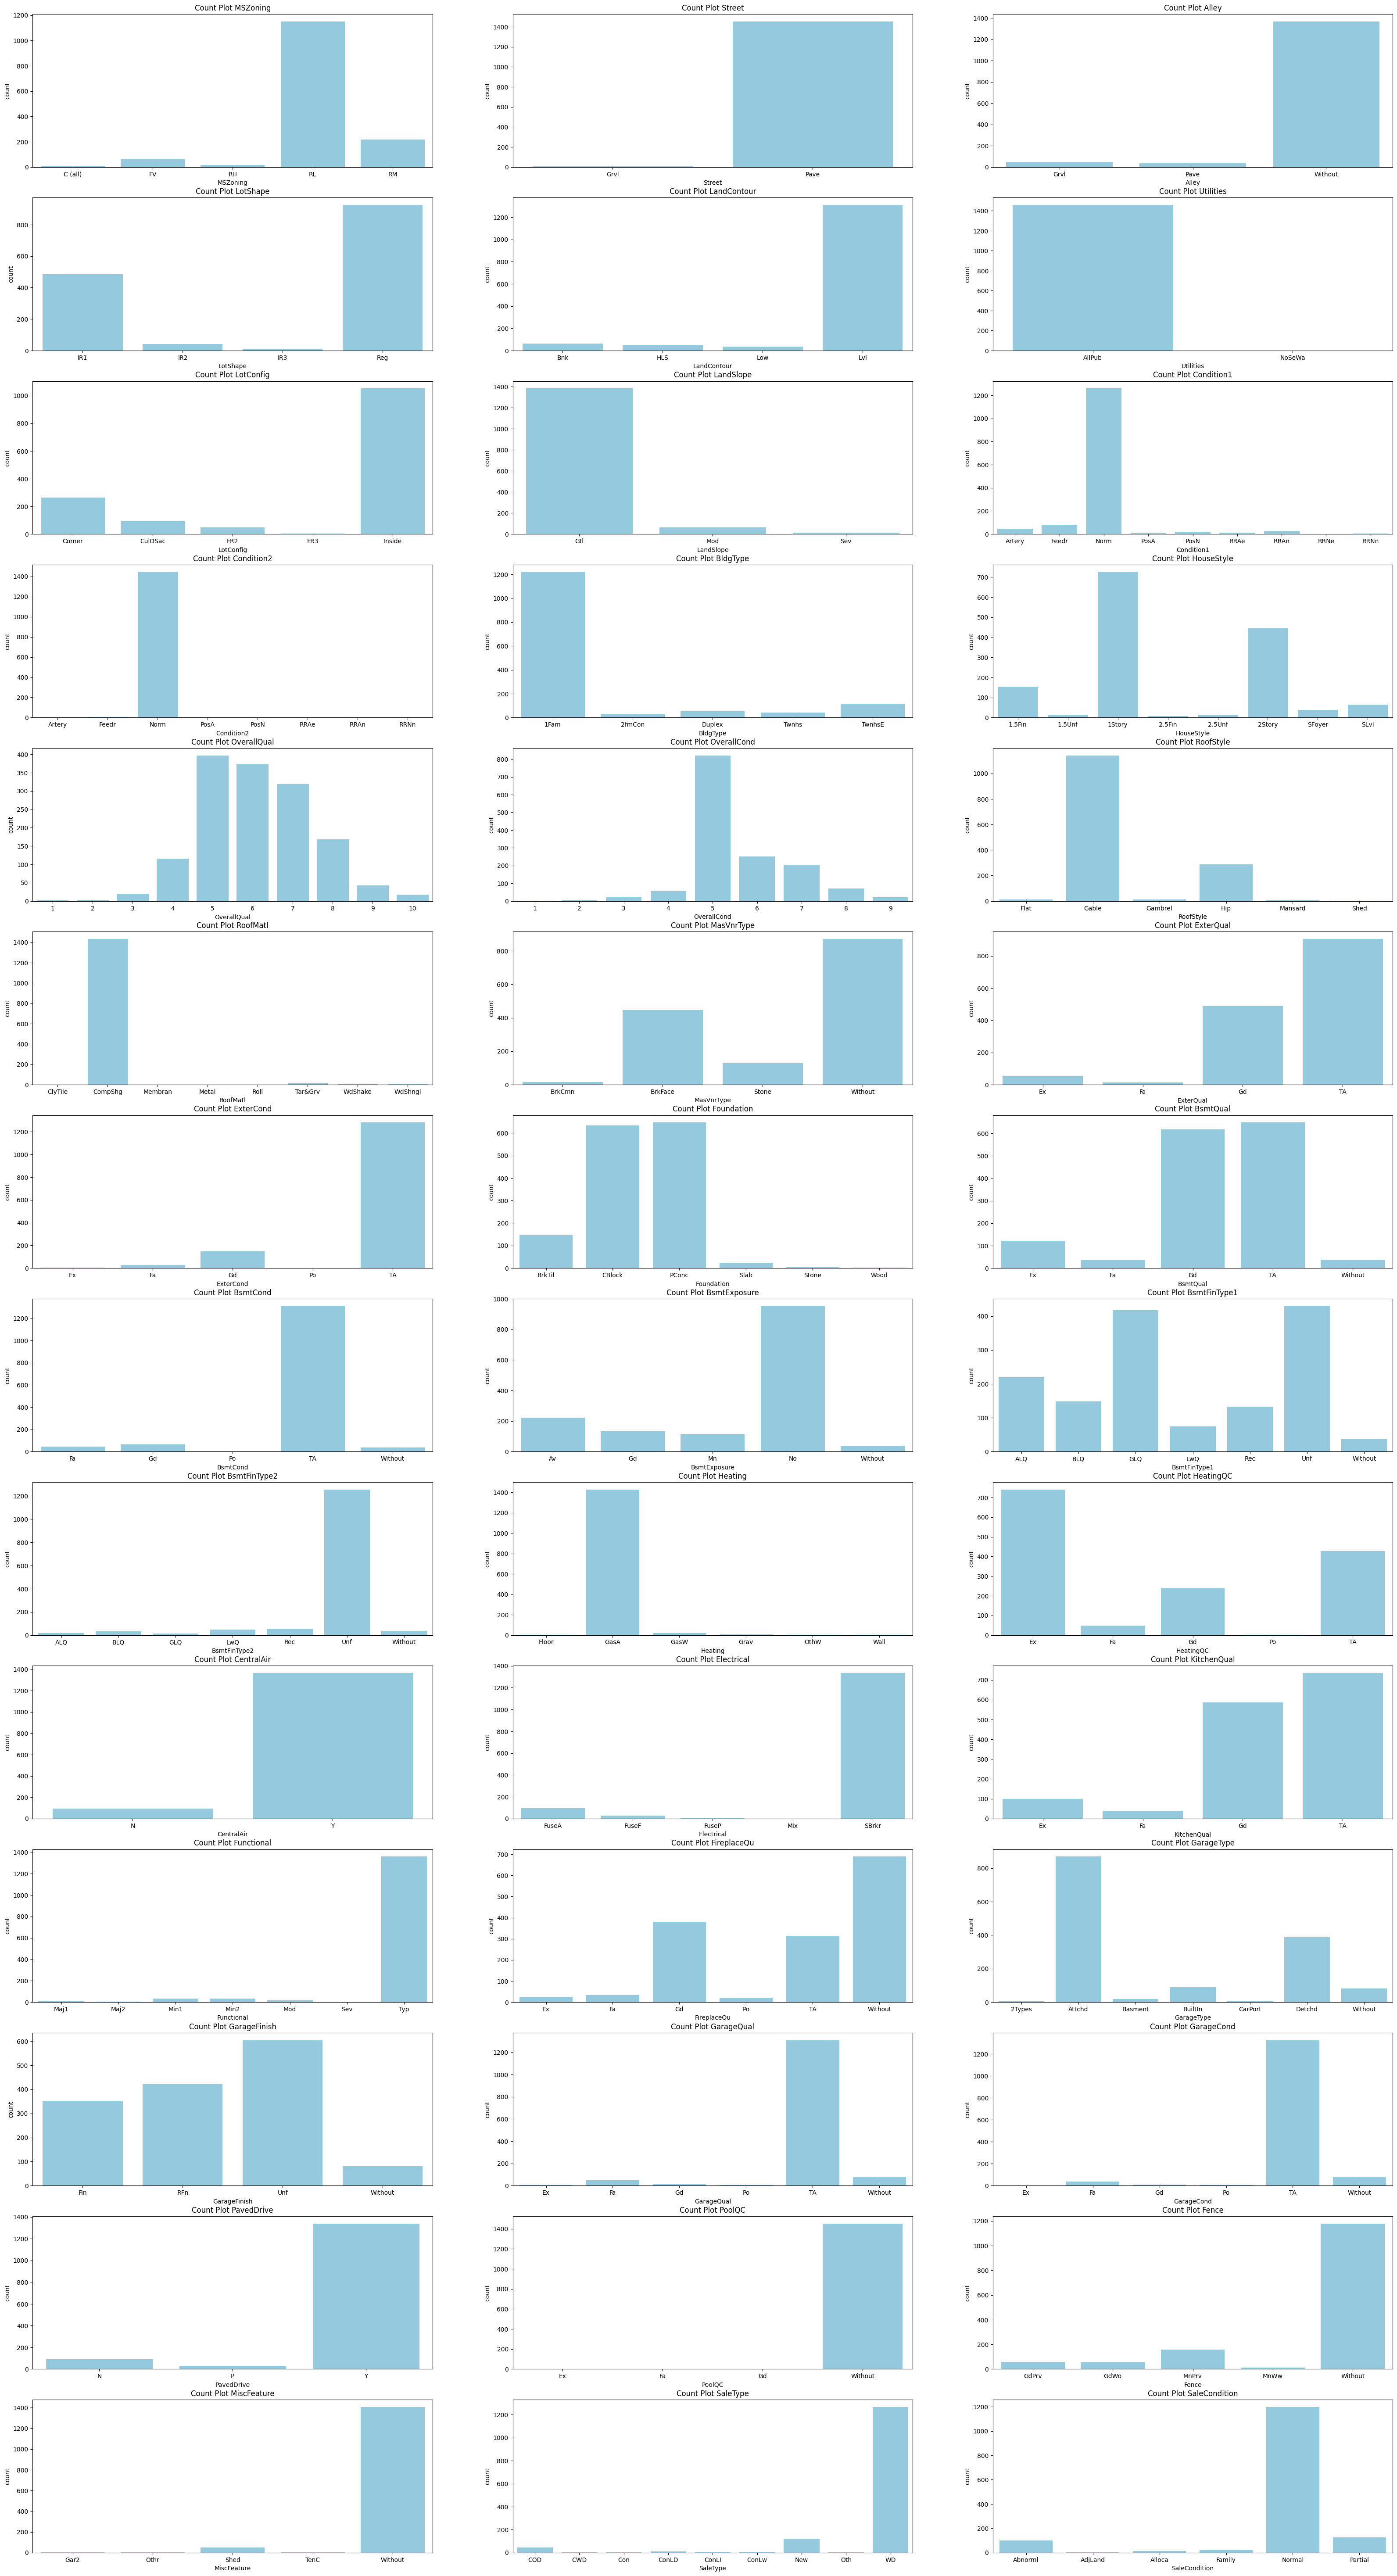

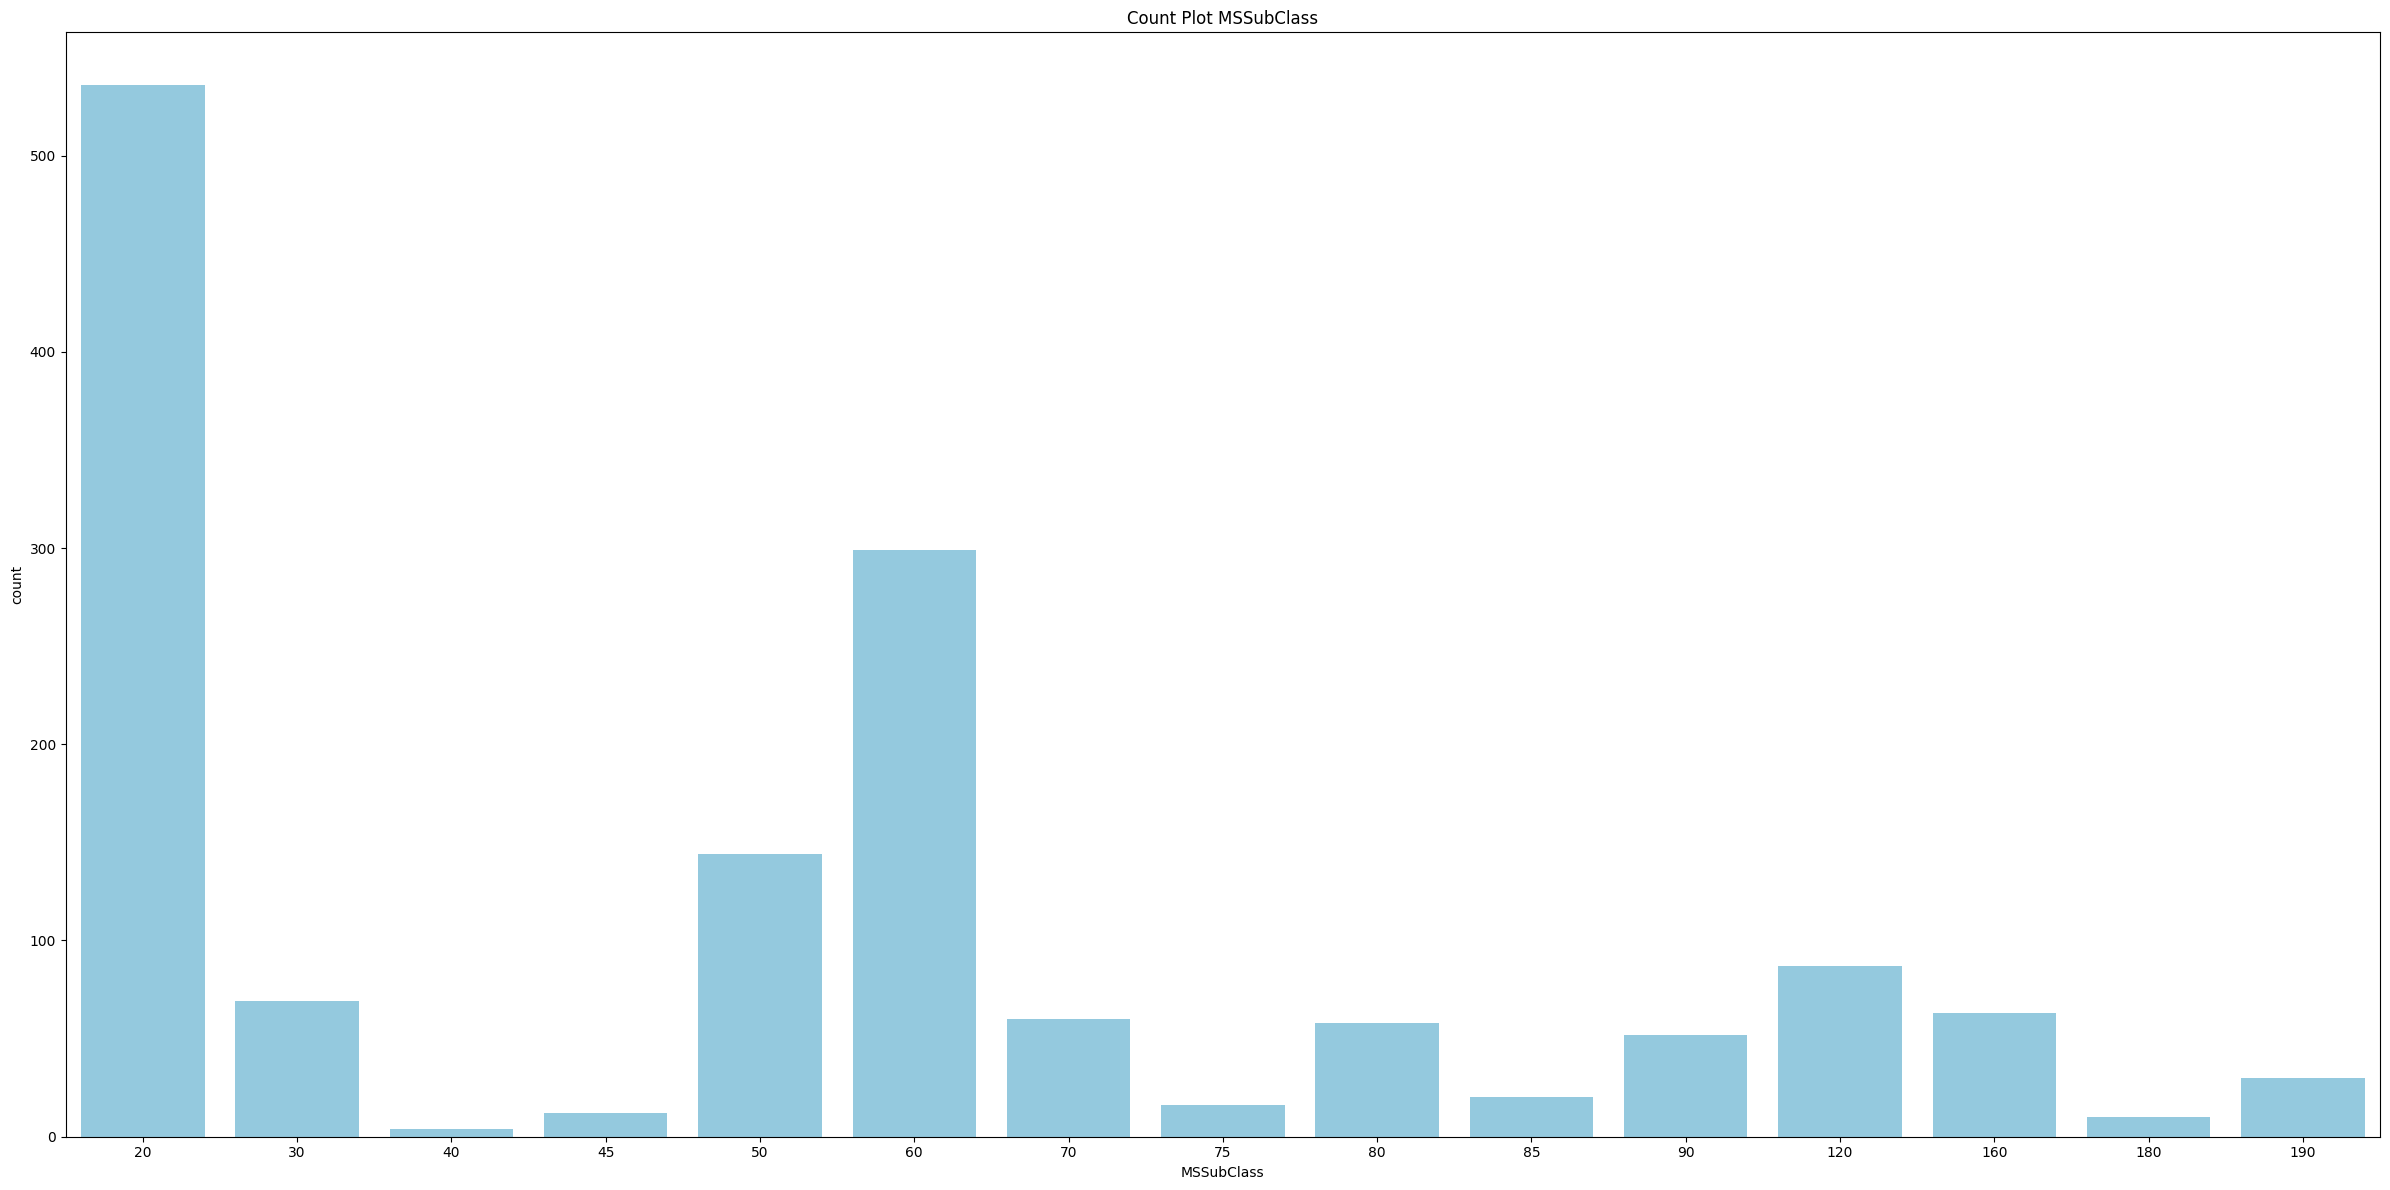

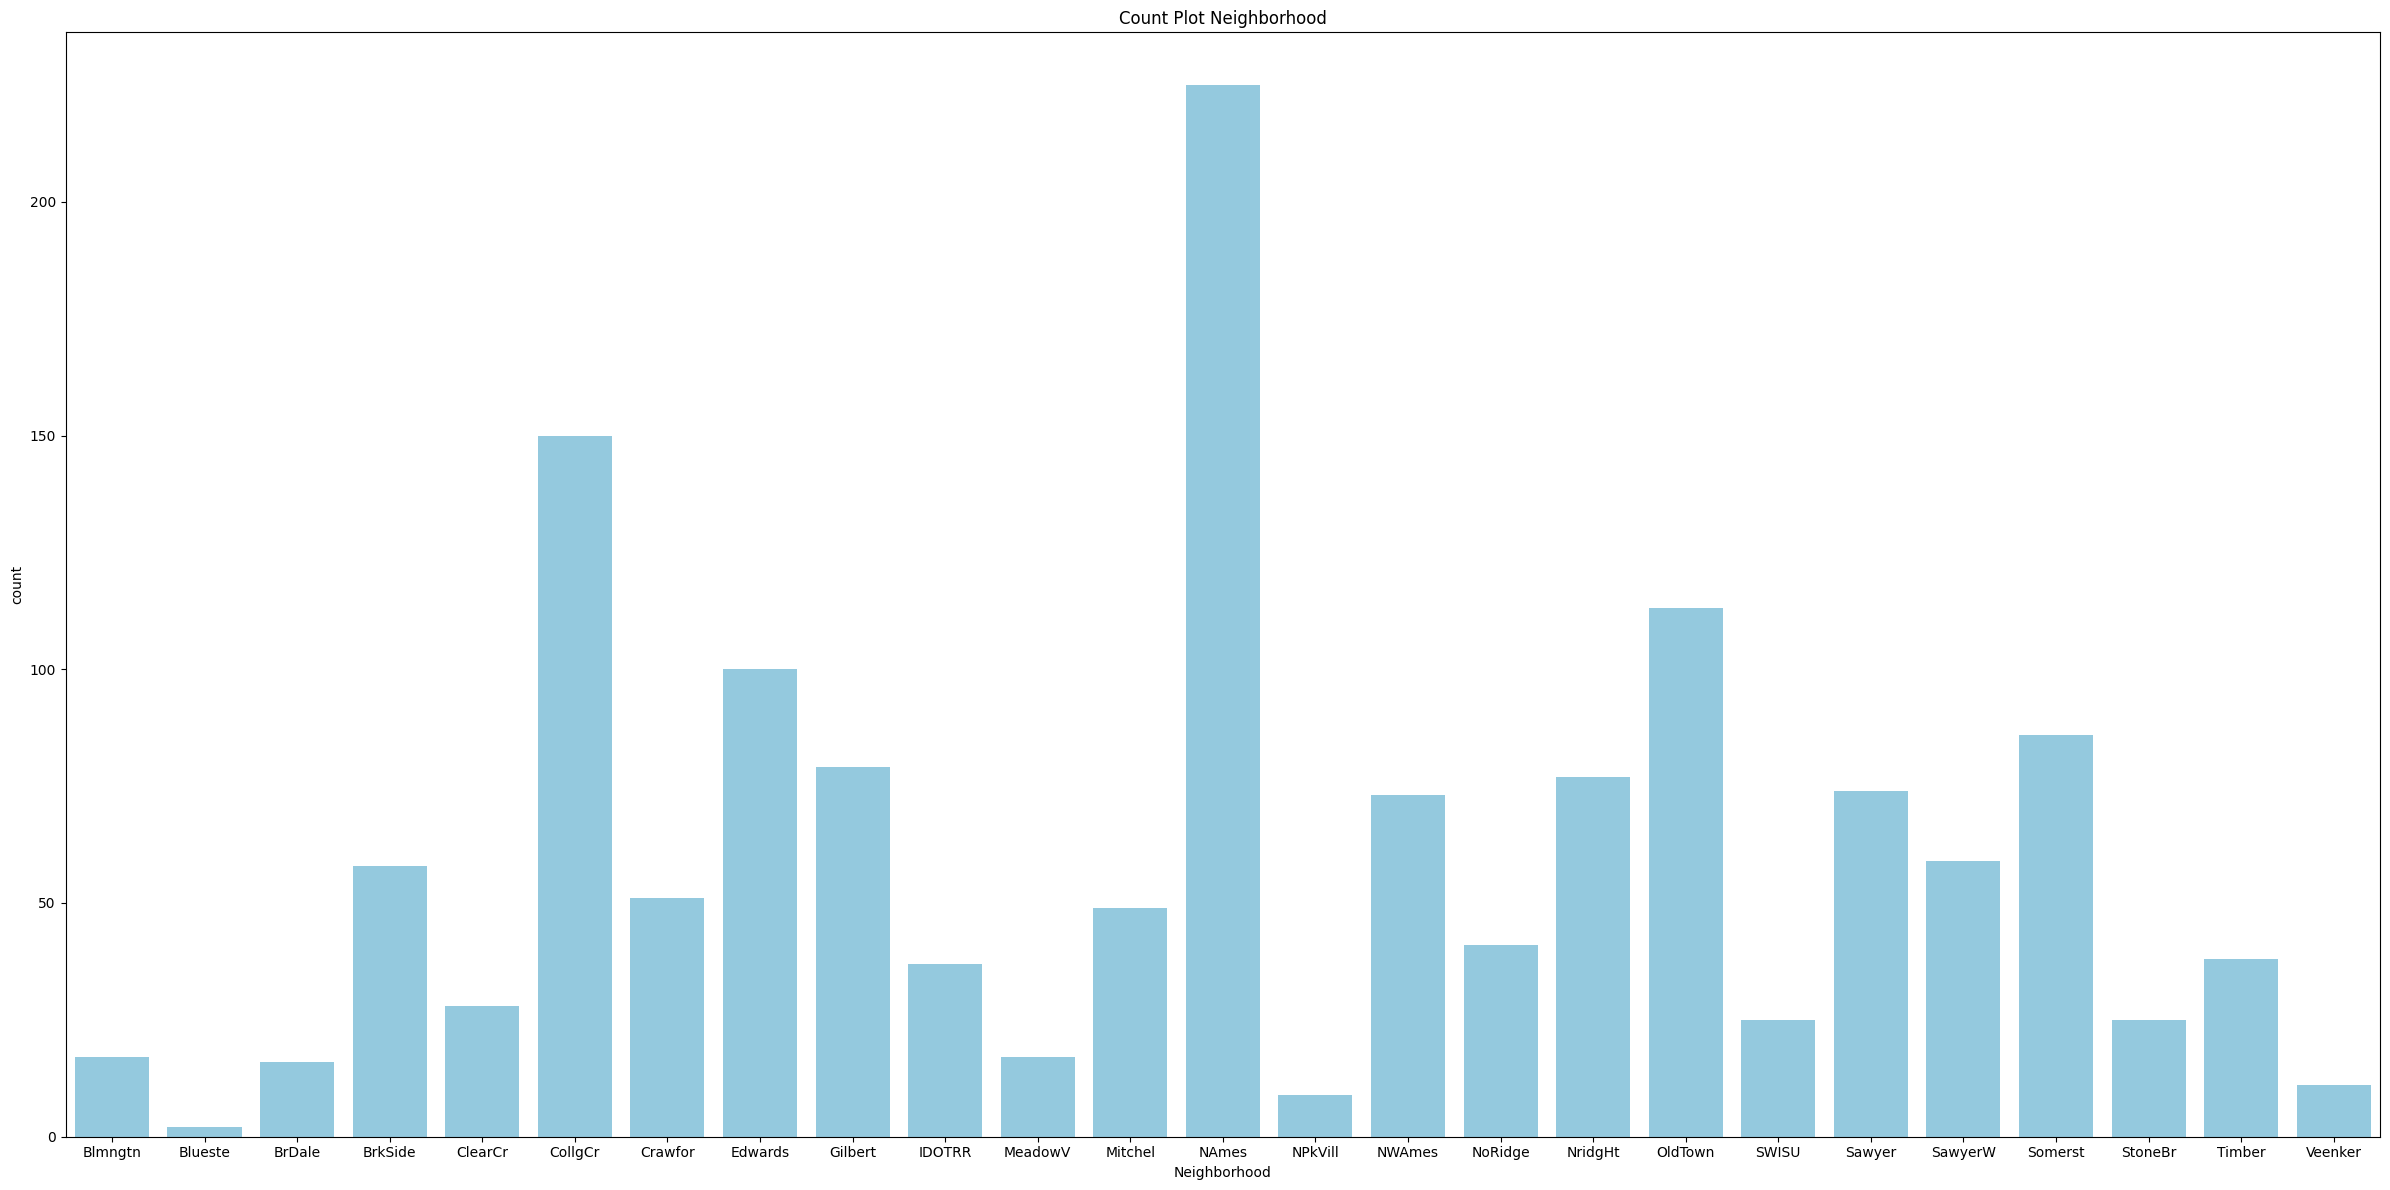

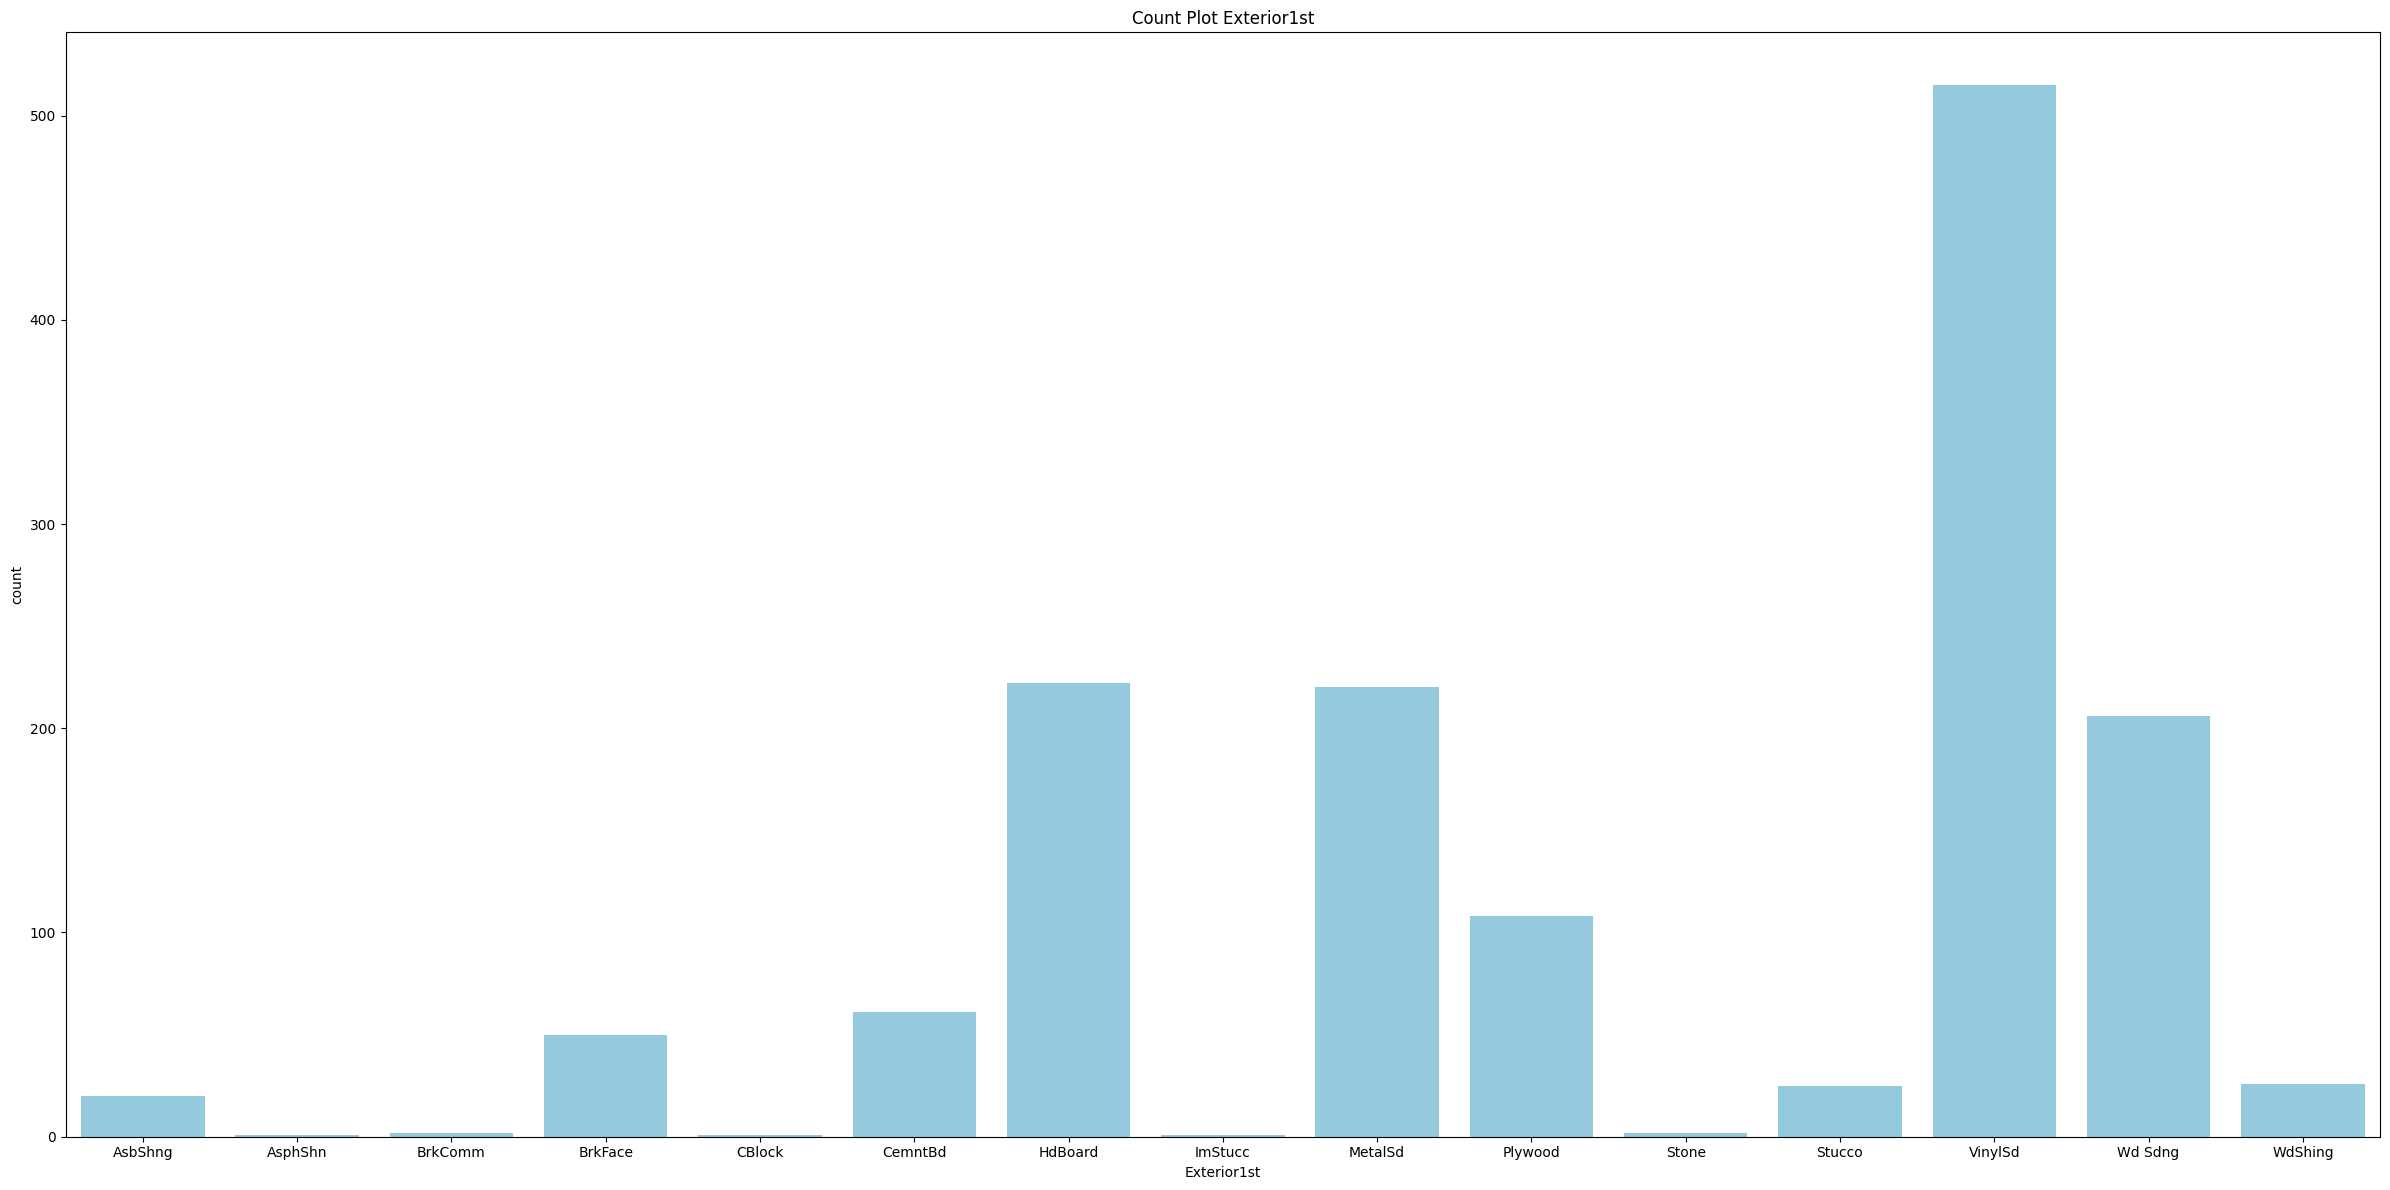

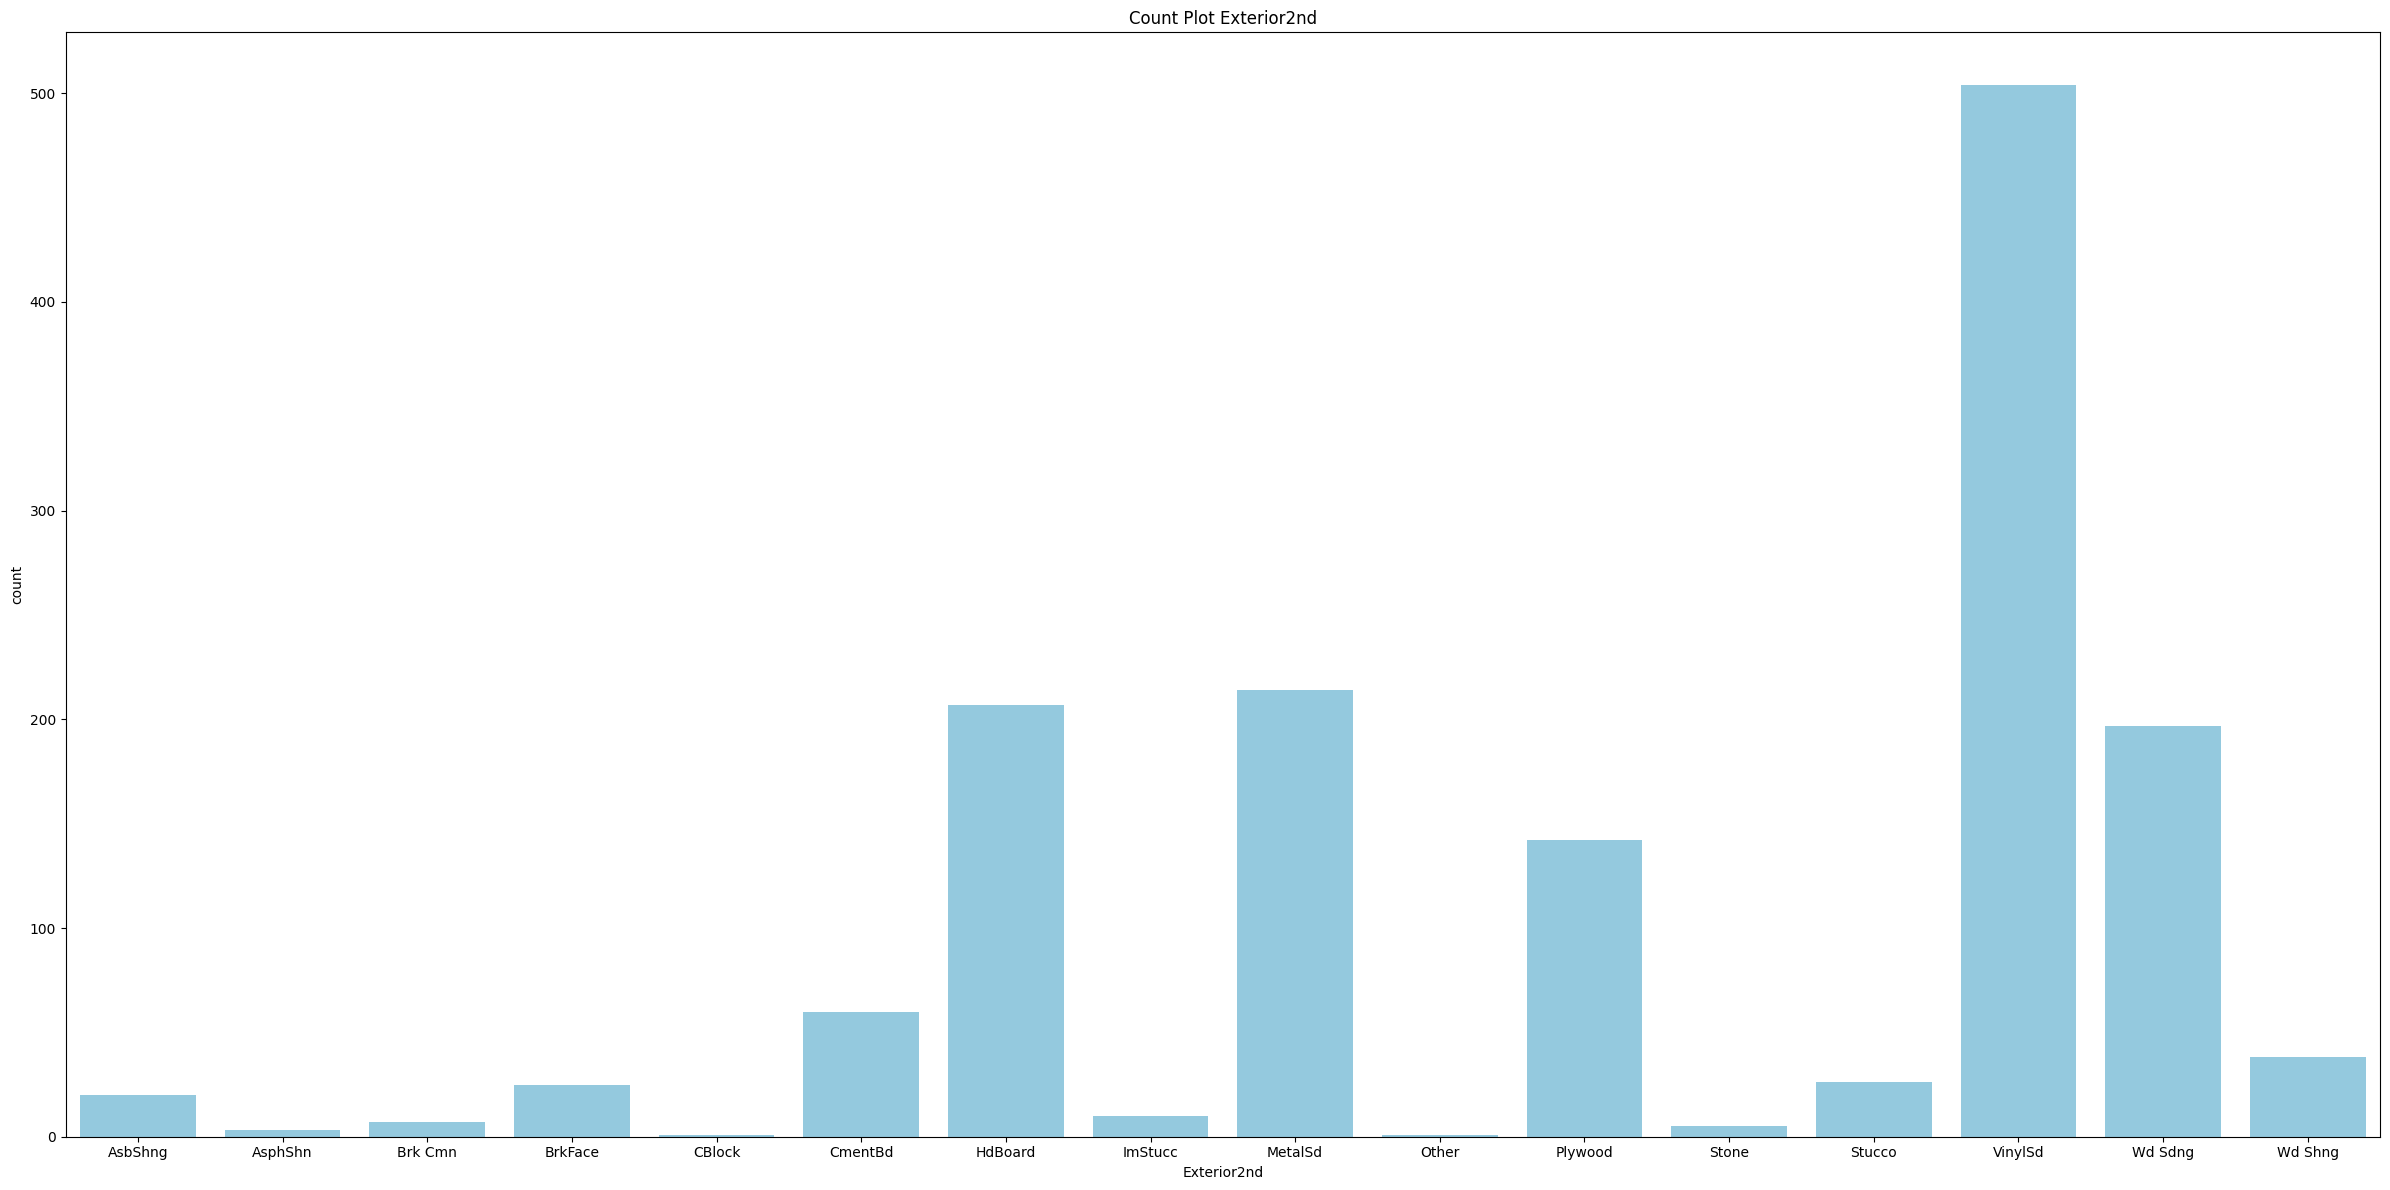

In [123]:
plot_categorical_histograms(data_eda)

### **Bi/Mul Variate Analysis**

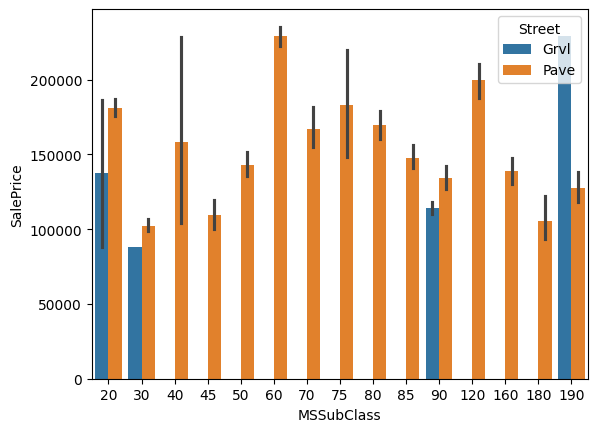

In [124]:
ax = sns.barplot(x="MSSubClass", y="SalePrice", hue="Street", data=data_eda)

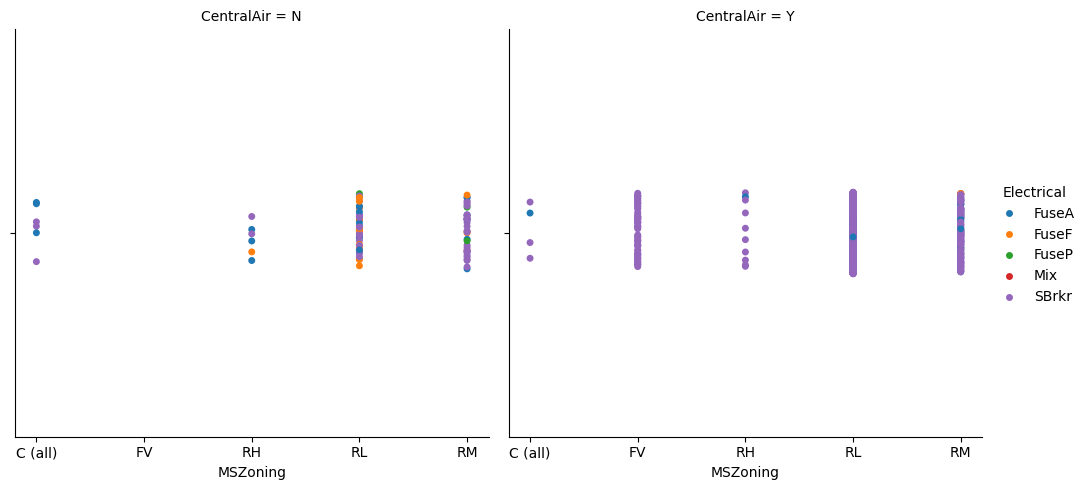

In [125]:
ax = sns.catplot(x='MSZoning', data=data_eda, col='CentralAir', hue='Electrical')

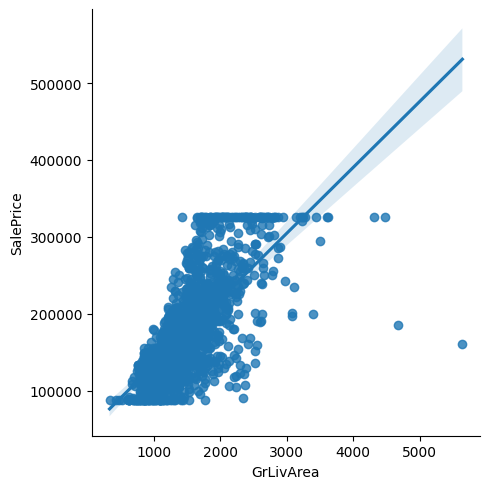

In [126]:
ax = sns.lmplot(x="GrLivArea", y="SalePrice", data=data_eda,)

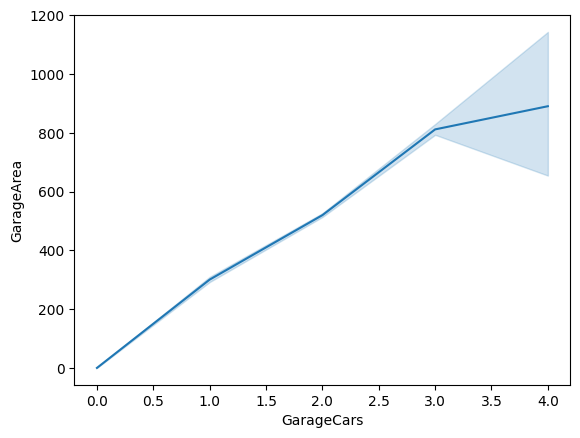

In [127]:
ax = sns.lineplot(x="GarageCars", y="GarageArea", data=data_eda)

## **Mean, Median, dan Modus**

`Mean`, `median`, dan `modus` adalah tiga metrik statistik yang digunakan untuk menggambarkan data secara deskriptif.

- **Mean** adalah jumlah dari semua nilai dalam kumpulan data dibagi dengan total jumlah nilai. `Mean` sering digunakan sebagai ukuran pusat yang paling umum, namun rentan terhadap pengaruh nilai ekstrem atau outlier. Jika ada outlier, mean dapat menjadi tidak representatif. Meskipun demikian, `mean` cocok digunakan untuk data yang terdistribusi normal atau mendekati normal.

- **Median** adalah nilai tengah dalam kumpulan data setelah diurutkan secara berurutan. `Median` tidak dipengaruhi oleh nilai ekstrem atau outlier, sehingga lebih stabil daripada `mean`. Karena itu, `median` lebih disukai untuk data yang memiliki distribusi yang miring (skewed) atau ketika ada nilai ekstrem.

- **Modus** adalah nilai yang paling sering muncul dalam kumpulan data. `Modus` dapat memiliki lebih dari satu nilai (multi-modal) jika ada beberapa nilai yang memiliki frekuensi yang sama. `Modus` berguna terutama untuk data kategorikal, tetapi juga dapat diterapkan pada data numerik.

Perbedaan utama antara ketiganya terletak pada cara mereka menangani nilai ekstrem dan distribusi data. `Mean` dapat dipengaruhi oleh nilai ekstrem, `median` lebih tahan terhadap nilai ekstrem, sementara `modus` hanya memperhatikan nilai yang paling sering muncul tanpa memperhatikan nilai numerik secara keseluruhan.


### **Data Numerik**

In [128]:
numeric_columns = df_otcC.select_dtypes(include=['int', 'float']).columns

modus_func = lambda x: x.mode().iloc[0]

aggregate_stats = df_otcC[numeric_columns].agg(['mean', 'median'])
aggregate_stats.loc['modus'] = df_otcC[numeric_columns].apply(modus_func)

print("Statistik Agregat:")
aggregate_stats

Statistik Agregat:


Id  LotFrontage       LotArea    YearBuilt  YearRemodAdd  \
mean    730.5    69.863699  10516.828082  1971.267808   1984.865753   
median  730.5    69.000000   9478.500000  1973.000000   1994.000000   
modus     1.0    69.000000   7200.000000  2006.000000   1950.000000   

        MasVnrArea  BsmtFinSF1  BsmtFinSF2   BsmtUnfSF  TotalBsmtSF  ...  \
mean    103.117123  443.639726   46.549315  567.240411  1057.429452  ...   
median    0.000000  383.500000    0.000000  477.500000   991.500000  ...   
modus     0.000000    0.000000    0.000000    0.000000     0.000000  ...   

        WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  \
mean     94.244521    46.660274       21.95411   3.409589    15.060959   
median    0.000000    25.000000        0.00000   0.000000     0.000000   
modus     0.000000     0.000000        0.00000   0.000000     0.000000   

        PoolArea    MiscVal    MoSold       YrSold     SalePrice  
mean    2.758904  43.489041  6.321918  2007.815753  177331.52637  
median  0.000000   0.000000  6.000000  2008.000000  163000.00000  
modus   0.000000   0.000000  6.000000  2009.000000  340037.50000  

[3 rows x 35 columns]

### **Data Kategorikal**

In [129]:
categorical_columns = df_otcC.select_dtypes(include=['category']).columns

modus_func = lambda x: x.mode().iloc[0]

mode_and_frequency = df_otcC[categorical_columns].apply(lambda x: (x.mode().iloc[0], len(x[x == x.mode().iloc[0]])))

print("Modus dan Frekuensi untuk Kolom Kategorikal:")
mode_and_frequency

Modus dan Frekuensi untuk Kolom Kategorikal:


MSSubClass MSZoning Street    Alley LotShape LandContour Utilities  \
0          20       RL   Pave  Without      Reg         Lvl    AllPub   
1         536     1151   1454     1369      925        1311      1459   

  LotConfig LandSlope Neighborhood  ... GarageType GarageFinish GarageQual  \
0    Inside       Gtl        NAmes  ...     Attchd          Unf         TA   
1      1052      1382          225  ...        870          605       1311   

  GarageCond  PavedDrive   PoolQC    Fence MiscFeature SaleType SaleCondition  
0         TA           Y  Without  Without     Without       WD        Normal  
1       1326        1340     1453     1179        1406     1267          1198  

[2 rows x 46 columns]

## **Statistical Five Summaries**


Statistical Five Summaries adalah alat analisis data eksploratif yang memberikan insight tentang distribusi nilai untuk suatu fitur. Secara kolektif, kumpulan statistik ini menjelaskan di mana nilai-nilai data terjadi, kecenderungan pusat, variabilitas, dan bentuk umum distribusinya.

### **Data Numerik**

In [130]:
print("\nLima Ringkasan Statistik untuk Fitur Numerik:")
data_eda.describe().loc[['min', '25%', '50%', '75%', 'max']]


Lima Ringkasan Statistik untuk Fitur Numerik:


Id  LotFrontage   LotArea  YearBuilt  YearRemodAdd  MasVnrArea  \
min     1.00         21.0    1300.0     1872.0        1950.0        0.00   
25%   365.75         60.0    7553.5     1954.0        1967.0        0.00   
50%   730.50         69.0    9478.5     1973.0        1994.0        0.00   
75%  1095.25         79.0   11601.5     2000.0        2004.0      164.25   
max  1460.00        313.0  215245.0     2010.0        2010.0     1600.00   

     BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  ...  WoodDeckSF  \
min        0.00         0.0        0.0         0.00  ...         0.0   
25%        0.00         0.0      223.0       795.75  ...         0.0   
50%      383.50         0.0      477.5       991.50  ...         0.0   
75%      712.25         0.0      808.0      1298.25  ...       168.0   
max     5644.00      1474.0     2336.0      6110.00  ...       857.0   

     OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  MiscVal  \
min          0.0            0.0        0.0          0.0       0.0      0.0   
25%          0.0            0.0        0.0          0.0       0.0      0.0   
50%         25.0            0.0        0.0          0.0       0.0      0.0   
75%         68.0            0.0        0.0          0.0       0.0      0.0   
max        547.0          552.0      508.0        480.0     738.0  15500.0   

     MoSold  YrSold  SalePrice  
min     1.0  2006.0    88000.0  
25%     5.0  2007.0   129975.0  
50%     6.0  2008.0   163000.0  
75%     8.0  2009.0   214000.0  
max    12.0  2010.0   326000.0  

[5 rows x 35 columns]

### **Data Kategorik**

In [131]:
print("\nEmpat Ringkasan Statistik untuk Fitur Kategorial:")
data_eda.describe(include=["category"])


Empat Ringkasan Statistik untuk Fitur Kategorial:


MSSubClass MSZoning Street    Alley LotShape LandContour Utilities  \
count         1460     1460   1460     1460     1460        1460      1460   
unique          15        5      2        3        4           4         2   
top             20       RL   Pave  Without      Reg         Lvl    AllPub   
freq           536     1151   1454     1369      925        1311      1459   

       LotConfig LandSlope Neighborhood  ... GarageType GarageFinish  \
count       1460      1460         1460  ...       1460         1460   
unique         5         3           25  ...          7            4   
top       Inside       Gtl        NAmes  ...     Attchd          Unf   
freq        1052      1382          225  ...        870          605   

       GarageQual GarageCond  PavedDrive   PoolQC    Fence MiscFeature  \
count        1460       1460        1460     1460     1460        1460   
unique          6          6           3        4        5           5   
top            TA         TA           Y  Without  Without     Without   
freq         1311       1326        1340     1453     1179        1406   

       SaleType SaleCondition  
count      1460          1460  
unique        9             6  
top          WD        Normal  
freq       1267          1198  

[4 rows x 46 columns]

## **Distribusi Data**

### **Standar Deviasi**

In [132]:
data_eda.describe().loc[['std']]

Id  LotFrontage      LotArea  YearBuilt  YearRemodAdd  \
std  421.610009    22.027677  9981.264932  30.202904     20.645407   

     MasVnrArea  BsmtFinSF1  BsmtFinSF2   BsmtUnfSF  TotalBsmtSF  ...  \
std  180.731373  456.098091  161.319273  441.866955   438.705324  ...   

     WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  \
std  125.338794    66.256028      61.119149  29.317331    55.757415   

      PoolArea     MiscVal    MoSold    YrSold     SalePrice  
std  40.177307  496.123024  2.703626  1.328095  64551.108307  

[1 rows x 35 columns]

### **Visualisasi**

In [133]:
def plot_distribution_plot_subplots(data):
    numeric_columns = data.select_dtypes(include='number').columns
    num_plots = len(numeric_columns)
    num_cols = 3
    num_rows = num_plots // num_cols
    if num_plots % num_cols:
        num_rows += 1
    fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(24, 96))
    
    for i, column in enumerate(numeric_columns):
        row = i // num_cols
        col = i % num_cols
        ax = axes[row, col]
        
        sns.kdeplot(data[column], ax=ax, color='skyblue', fill=True)
        ax.set_title(f'Distribusi {column}')
        ax.set_xlabel(column)
        ax.set_ylabel('Density')
        ax.grid(False)
    
    for i in range(num_plots, num_rows * num_cols):
        plt.delaxes(plt.subplot(num_rows, num_cols, i + 1))
    
    plt.show()


Visualisasi Distribusi Data dari Setiap Kolom:


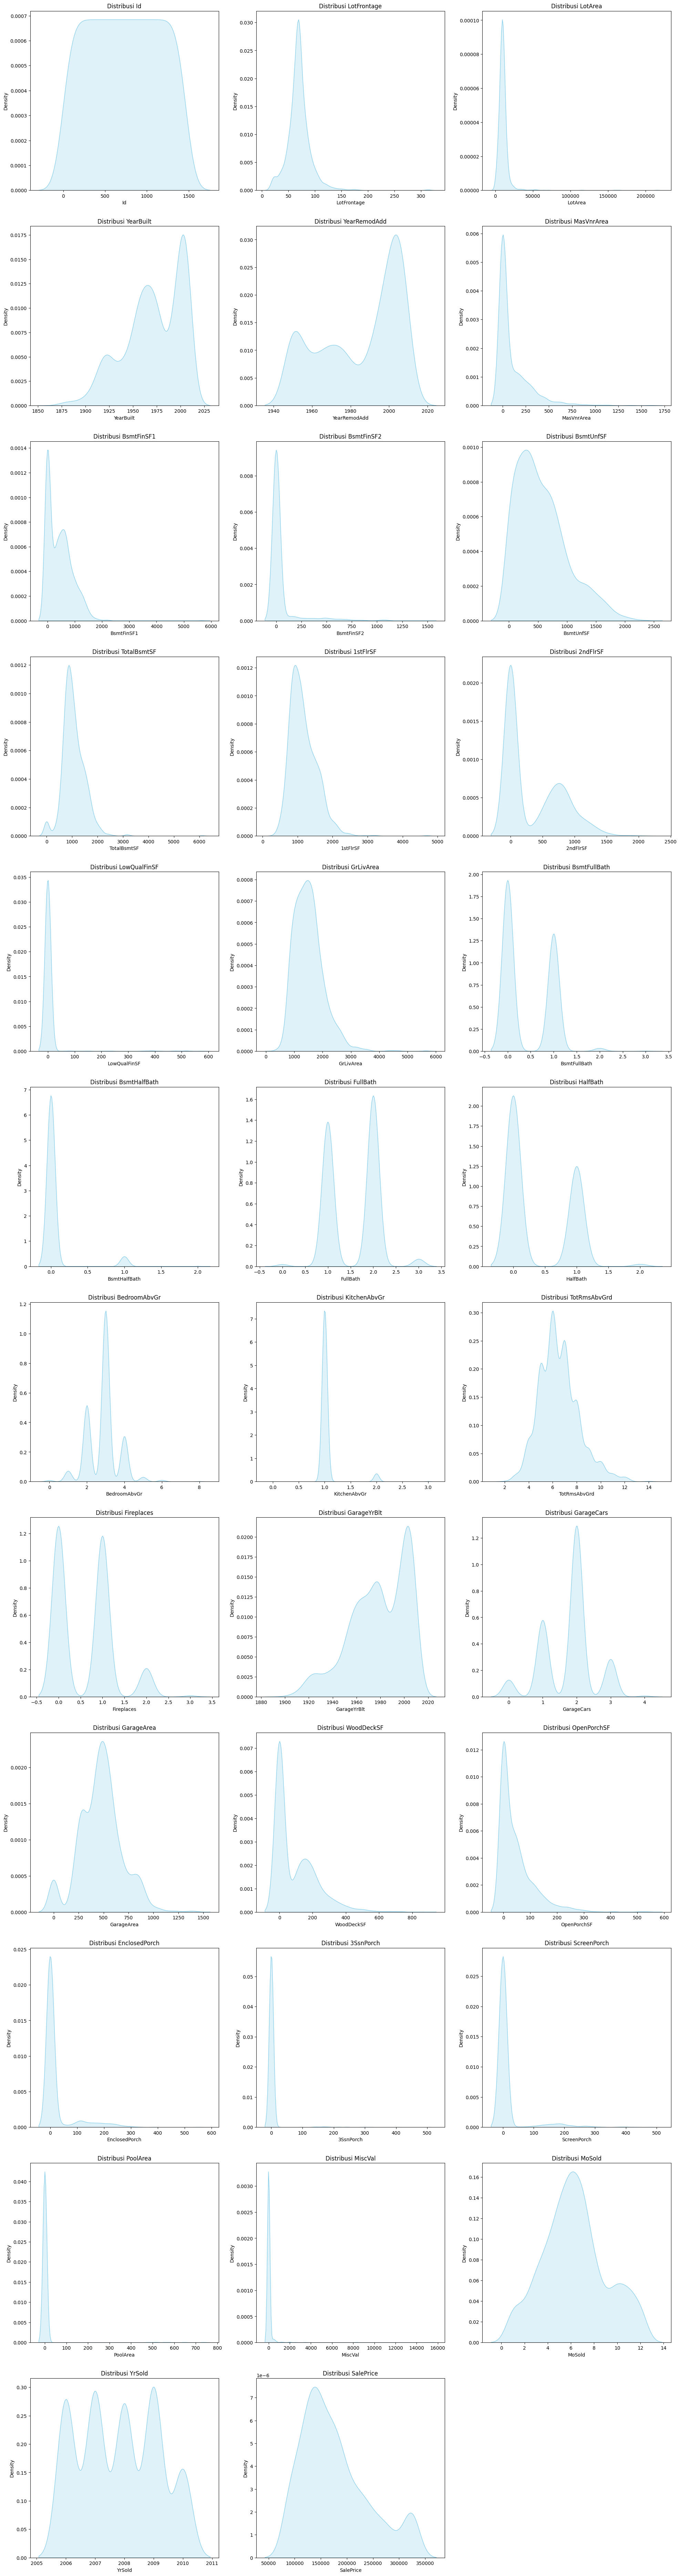

In [134]:
print("\nVisualisasi Distribusi Data dari Setiap Kolom:")
plot_distribution_plot_subplots(data_eda)

### **Memeriksa Distribusi Fitur**

In [135]:
for nama_kolom in data_eda.select_dtypes(include='number').columns:
    print(f"{nama_kolom}")
    
    # Hitung skewness
    skewness = skew(data_eda[nama_kolom])
    print(f"Skewness: {skewness}")


    p_value = norm.sf(abs(skewness))
    if p_value < 0.05:
        print(f"Skewness dari {nama_kolom} signifikan (p-value={p_value}), menunjukkan distribusi tidak normal.")
    else:
        print(f"Skewness dari {nama_kolom} tidak signifikan (p-value={p_value}), menunjukkan distribusi normal.")

    print("\n")

Id
Skewness: 0.0
Skewness dari Id tidak signifikan (p-value=0.5), menunjukkan distribusi normal.


LotFrontage
Skewness: 2.4066708091473084
Skewness dari LotFrontage signifikan (p-value=0.008049336885087863), menunjukkan distribusi tidak normal.


LotArea
Skewness: 12.195142125084478
Skewness dari LotArea signifikan (p-value=1.6496393522549916e-34), menunjukkan distribusi tidak normal.


YearBuilt
Skewness: -0.612830724202899
Skewness dari YearBuilt tidak signifikan (p-value=0.2699941366332642), menunjukkan distribusi normal.


YearRemodAdd
Skewness: -0.5030444967597948
Skewness dari YearRemodAdd tidak signifikan (p-value=0.3074664940394669), menunjukkan distribusi normal.


MasVnrArea
Skewness: 2.6748646898037354
Skewness dari MasVnrArea signifikan (p-value=0.0037379708344320263), menunjukkan distribusi tidak normal.


BsmtFinSF1
Skewness: 1.6837708962341815
Skewness dari BsmtFinSF1 signifikan (p-value=0.0461129769253594), menunjukkan distribusi tidak normal.


BsmtFinSF2
Skewness: 4.

# **Feature Engineering**

## **Load Dataset**

In [136]:
# Membaca dataset
data = df_otcW.copy()

## **Pembuatan Fitur Baru**

### **Agregasi**

In [137]:
# Fitur baru: TotalBuildingSF
data['TotalBuildingSF'] = data['1stFlrSF'] + data['2ndFlrSF'] + data['TotalBsmtSF']


Insight: 
* Fitur ini menunjukkan total luas bangunan yang terdiri dari luas lantai pertama, lantai kedua, dan luas basement.
* Semakin besar nilai TotalBuildingSF, semakin besar ukuran keseluruhan bangunan.

In [138]:
# Fitur baru: TotalBathrooms
data['TotalBathrooms'] = (data['FullBath'] + data['HalfBath']) + (data['BsmtFullBath'] + data['BsmtHalfBath'])

Insight: 
* Fitur ini menunjukkan jumlah total kamar mandi di atas dan di bawah grade.
* Semakin besar nilai TotalBathrooms, semakin banyak kamar mandi yang tersedia di properti tersebut.

In [139]:
# Fitur baru: TotalStreetFrontage
outdoor_features = ['LotFrontage','WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch']
data['TotalStreetFrontage'] = data[outdoor_features].sum(axis=1)

Insight: 
* Fitur ini menunjukkan total panjang garis depan properti, termasuk panjang garis depan dari garasi dan teras.
* Semakin besar nilai TotalStreetFrontage, semakin besar panjang garis depan properti.

In [140]:
# Fitur baru: MainFloorBathrooms
data['MainFloorBathrooms'] = data['FullBath'] + data['HalfBath']

Insight: 
* Fitur ini menunjukkan jumlah total kamar mandi di lantai pertama.
* Mengetahui jumlah kamar mandi di lantai pertama dapat memberikan gambaran tentang kenyamanan dan fungsionalitas rumah.

In [141]:
# Fitur baru: MainFloorRatio
data['MainFloorRatio'] = data['1stFlrSF'] / data['TotalBuildingSF']

Insight: 
* Fitur ini menunjukkan rasio antara luas lantai pertama dengan total luas bangunan.
* Rasio yang lebih tinggi menunjukkan proporsi yang lebih besar dari bangunan yang berada di lantai pertama.

In [142]:
# Fitur baru: LivingAreaPerRoom
data['LivingAreaPerRoom'] = data['GrLivArea'] / data['TotRmsAbvGrd']

Insight: 
* Fitur ini menunjukkan rata-rata luas area tinggal per ruangan di atas grade.
* Semakin besar nilai LivingAreaPerRoom, semakin besar ruang yang tersedia per ruangan.

In [143]:
# Fitur baru: GarageAreaPerCar
data['GarageAreaPerCar'] = data['GarageArea'] / data['GarageCars']

Insight
* Fitur ini menunjukkan rata-rata luas gudang per mobil.
* Semakin besar nilai GarageAreaPerCar, semakin banyak ruang yang tersedia untuk setiap mobil di gudang.

### **Transformasi**

In [144]:
# Fitur baru: PropertyAge
data['PropertyAge'] = data['YrSold'] - data['YearBuilt']

Insight
* Fitur ini menunjukkan usia properti pada saat penjualan.
* Semakin besar nilai PropertyAge, semakin tua properti tersebut.

In [145]:
# Fitur baru: GarageAge
data['GarageAge'] = data['YrSold'] - data['GarageYrBlt']

Insight
* Fitur ini menunjukkan usia garasi pada saat penjualan.
* Semakin besar nilai GarageAge, semakin tua garasi tersebut.

In [146]:
# Fitur baru: PorchType
porch_types = []
for index, row in data.iterrows():
    if row['OpenPorchSF'] > 0 or row['EnclosedPorch'] > 0:
        porch_types.append('Covered')
    elif row['ScreenPorch'] > 0:
        porch_types.append('Screened')
    else:
        porch_types.append('Without')
data['PorchType'] = porch_types

Insight: 
* Fitur ini menunjukkan jenis teras yang dimiliki oleh properti, apakah tertutup (Covered), terlindungi(Screened), atau tanpa teras (Without).
* Mengetahui jenis teras dapat memberikan gambaran tentang ruang outdoor yang tersedia dan tingkat kenyamanan untuk beraktivitas di luar ruangan.

### **Ekstraksi**

In [147]:
# Fitur naru: Remodeled
data['Remodeled'] = (data['YearBuilt'] == data['YearRemodAdd'])

Insight:
* Fitur ini menunjukkan apakah rumah telah direnovasi sebelum penjualan atau tidak.
* Mengetahui apakah rumah telah direnovasi dapat memberikan informasi tambahan tentang kondisi dan nilai properti.

In [148]:
# Fitur baru: BuildingRating
data['BuildingRating'] = np.ceil((data['OverallQual'].astype(int) + data['OverallCond'].astype(int)) / 2).astype(int)


Insight: 
* Fitur ini menunjukkan penilaian keseluruhan rumah, dihitung sebagai nilai rata-rata dari OverallQual dan OverallCond, yang dibulatkan ke atas.
* Semakin tinggi nilai BuildingRating, semakin tinggi penilaian bangunan rumah.

### **Tampilkan**

In [149]:
data.iloc[:, -15:]

SaleType SaleCondition  SalePrice  TotalBuildingSF  TotalBathrooms  \
0          WD        Normal     208500             2566               4   
1          WD        Normal     181500             2524               3   
2          WD        Normal     223500             2706               4   
3          WD       Abnorml     140000             2473               2   
4          WD        Normal     250000             3343               4   
...       ...           ...        ...              ...             ...   
1455       WD        Normal     175000             2600               3   
1456       WD        Normal     210000             3615               3   
1457       WD        Normal     266500             3492               2   
1458       WD        Normal     142125             2156               2   
1459       WD        Normal     147500             2512               3   

      TotalStreetFrontage  MainFloorBathrooms  MainFloorRatio  \
0                   126.0                   3        0.333593   
1                   378.0                   2        0.500000   
2                   110.0                   3        0.339985   
3                   367.0                   1        0.388597   
4                   360.0                   3        0.342507   
...                   ...                 ...             ...   
1455                102.0                   3        0.366538   
1456                434.0                   2        0.573444   
1457                126.0                   2        0.340206   
1458                546.0                   1        0.500000   
1459                879.0                   2        0.500000   

      LivingAreaPerRoom  GarageAreaPerCar  PropertyAge  GarageAge PorchType  \
0            213.750000        274.000000            5        5.0   Covered   
1            210.333333        230.000000           31       31.0   Without   
2            297.666667        304.000000            7        7.0   Covered   
3            245.285714        214.000000           91        8.0   Covered   
4            244.222222        278.666667            8        8.0   Covered   
...                 ...               ...          ...        ...       ...   
1455         235.285714        230.000000            8        8.0   Covered   
1456         296.142857        250.000000           32       32.0   Without   
1457         260.000000        252.000000           69       69.0   Covered   
1458         215.600000        240.000000           60       60.0   Covered   
1459         209.333333        276.000000           43       43.0   Covered   

      Remodeled  BuildingRating  
0          True               6  
1          True               7  
2         False               6  
3         False               6  
4          True               7  
...         ...             ...  
1455      False               6  
1456      False               6  
1457      False               8  
1458      False               6  
1459       True               6  

[1460 rows x 15 columns]